In [2]:
#libraries
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

#data
df = pd.read_excel("C:/Users/MOON/Desktop/2024 바이오소재공학연구실/모델식 데이터.xlsx")
DataFrame = df.drop(columns = ['소구분'], axis = 1)
DataFrame.head()

,온도,DIM,THI,유량,사료섭취량,음수섭취량,직장온도,피부온도
0,25.0,NaN,71,45.88,48.84,93.40,NaN,NaN
1,25.0,NaN,71,41.52,47.48,102.00,NaN,NaN
2,25.0,NaN,71,47.40,46.06,104.40,NaN,NaN
3,25.0,NaN,71,44.32,45.03,107.48,38.2,NaN
4,25.0,NaN,71,43.78,44.26,131.38,NaN,NaN


In [3]:
#기술통계량 확인(df)
des_df = round(DataFrame.describe(),4)
des_df

,온도,DIM,THI,유량,사료섭취량,음수섭취량,직장온도,피부온도
count,364.0000,180.0000,364.0000,364.0000,364.0000,364.0000,76.0000,44.0000
mean,26.3242,57.3333,75.6484,30.6155,31.1317,91.0002,38.8184,31.2068
std,3.7902,3.1799,6.8697,5.6346,7.6916,30.3974,0.6416,0.9260
min,21.5000,52.0000,68.0000,17.9400,3.3500,24.5000,37.7000,30.0000
25%,21.5000,55.0000,68.0000,27.0300,26.7800,67.5000,38.3000,30.4000
50%,25.0000,57.5000,73.0000,29.5250,30.0000,84.4500,38.7000,31.0500
75%,31.0000,59.5000,82.0000,33.8100,35.1925,106.3250,39.1000,31.7500
max,31.5000,62.0000,86.0000,48.8800,64.9800,195.0000,40.7000,33.4000


In [4]:
#이상치 제거
DataFrame_1 = DataFrame[['피부온도']].dropna(axis = 0)
print(DataFrame_1)
def remove_outliers_iqr(data, column_name, threshold=1.5):
    Q1 = np.percentile(data[column_name], 25)  # 1사분위수
    Q3 = np.percentile(data[column_name], 75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    
    # 이상치를 탐지하여 제거하는 과정
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outlier_indices = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)].index
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    
    return data, outlier_indices

Data, Outlier_indices  = remove_outliers_iqr(DataFrame_1, '피부온도')
print(Data.describe())
print(Outlier_indices)

     피부온도
134  31.4
141  31.6
148  32.1
155  31.9
162  33.4
169  32.9
176  33.0
183  32.7
186  30.9
193  31.2
198  30.4
201  30.8
208  31.3
213  30.3
216  30.9
223  31.1
228  30.4
231  30.9
238  31.1
243  30.4
246  30.0
253  31.6
258  30.8
261  30.0
268  32.1
273  30.6
276  30.2
283  31.2
288  30.2
291  30.2
298  31.7
303  30.0
306  31.0
313  32.7
318  30.3
321  31.1
328  32.4
333  30.2
336  30.9
343  32.3
348  30.2
351  31.2
358  32.6
363  30.9
            피부온도
count  44.000000
mean   31.206818
std     0.925956
min    30.000000
25%    30.400000
50%    31.050000
75%    31.750000
max    33.400000
Index([], dtype='int64')


In [4]:
# DataFrame에서 종속 변수 열 선택
dependent_variable = DataFrame['유량']

# 이상치 제거 기준 설정 (예: Z-score를 사용한 방법)
z_scores = np.abs((dependent_variable - dependent_variable.mean()) / dependent_variable.std())
threshold = 3  # 임계값 설정
print(z_scores)
# 이상치의 인덱스 확인
outlier_indices = z_scores[z_scores > threshold].index
print("이상치의 인덱스:")
print(outlier_indices)
# 이상치 제거
data_de = DataFrame[z_scores <= threshold]
round(data_de.describe(),4)

0      2.709091
1      1.935295
2      2.978854
3      2.432228
4      2.336391
         ...   
359    0.478379
360    0.002743
361    0.057599
362    0.771052
363    0.117941
Name: 유량, Length: 364, dtype: float64
이상치의 인덱스:
Int64Index([8, 25], dtype='int64')


,온도,DIM,THI,유량,사료섭취량,음수섭취량,직장온도,피부온도
count,362.0000,180.0000,362.0000,362.0000,362.0000,362.0000,76.0000,44.0000
mean,26.3315,57.3333,75.6685,30.5181,31.1144,90.9348,38.8184,31.2068
std,3.7994,3.1799,6.8829,5.4946,7.6876,30.4665,0.6416,0.9260
min,21.5000,52.0000,68.0000,17.9400,3.3500,24.5000,37.7000,30.0000
25%,21.5000,55.0000,68.0000,27.0100,26.8400,67.5000,38.3000,30.4000
50%,25.0000,57.5000,73.0000,29.4500,30.0000,83.9000,38.7000,31.0500
75%,31.0000,59.5000,82.0000,33.7350,35.1750,105.8250,39.1000,31.7500
max,31.5000,62.0000,86.0000,47.4000,64.9800,195.0000,40.7000,33.4000


In [5]:
#이상치 제거 데이터
df_1 = pd.read_excel("C:/Users/MOON/Desktop/2024 바이오소재공학연구실/모델식 데이터.xlsx")
DataFrame_ou = df_1.drop(columns = ['소구분'], axis = 1)
#기술통계량 확인
des_df_ou = round(DataFrame_ou.describe(),4)
des_df_ou

,온도,DIM,THI,유량,사료섭취량,음수섭취량,직장온도,피부온도
count,364.0000,180.0000,364.0000,364.0000,364.0000,364.0000,76.0000,44.0000
mean,26.3242,57.3333,75.6484,30.6155,31.1317,91.0002,38.8184,31.2068
std,3.7902,3.1799,6.8697,5.6346,7.6916,30.3974,0.6416,0.9260
min,21.5000,52.0000,68.0000,17.9400,3.3500,24.5000,37.7000,30.0000
25%,21.5000,55.0000,68.0000,27.0300,26.7800,67.5000,38.3000,30.4000
50%,25.0000,57.5000,73.0000,29.5250,30.0000,84.4500,38.7000,31.0500
75%,31.0000,59.5000,82.0000,33.8100,35.1925,106.3250,39.1000,31.7500
max,31.5000,62.0000,86.0000,48.8800,64.9800,195.0000,40.7000,33.4000


In [6]:
#Data nomalization
nor_df = (DataFrame_ou - DataFrame_ou.min()) / (DataFrame_ou.max() - DataFrame_ou.min())
print(nor_df.describe())
# Undo normalization for y value
y_unnormalized = nor_df['유량'] * (DataFrame_ou['유량'].max() - DataFrame_ou['유량'].min()) + DataFrame_ou['유량'].min()
# Remove flow column from nor_df
nor_df.drop('유량', axis=1, inplace=True)
# Add y_unnormalized column to nor_df
nor_df['유량'] = y_unnormalized
print(nor_df.describe())

               온도         DIM         THI          유량       사료섭취량       음수섭취량  \
count  364.000000  180.000000  364.000000  362.000000  350.000000  354.000000   
mean     0.482418    0.533333    0.424908    0.426954    0.504807    0.463045   
std      0.379021    0.317989    0.381650    0.186510    0.192313    0.195543   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.300000    0.000000    0.307875    0.382450    0.309157   
50%      0.350000    0.550000    0.277778    0.390699    0.470201    0.412692   
75%      0.950000    0.750000    0.777778    0.536151    0.624064    0.581816   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            직장온도       피부온도  
count  73.000000  44.000000  
mean    0.402529   0.354947  
std     0.209104   0.272340  
min     0.000000   0.000000  
25%     0.230769   0.117647  
50%     0.384615   0.308824  
75%     0.538462   0.514706  
max     1.000000   1.000000  


<Axes: >

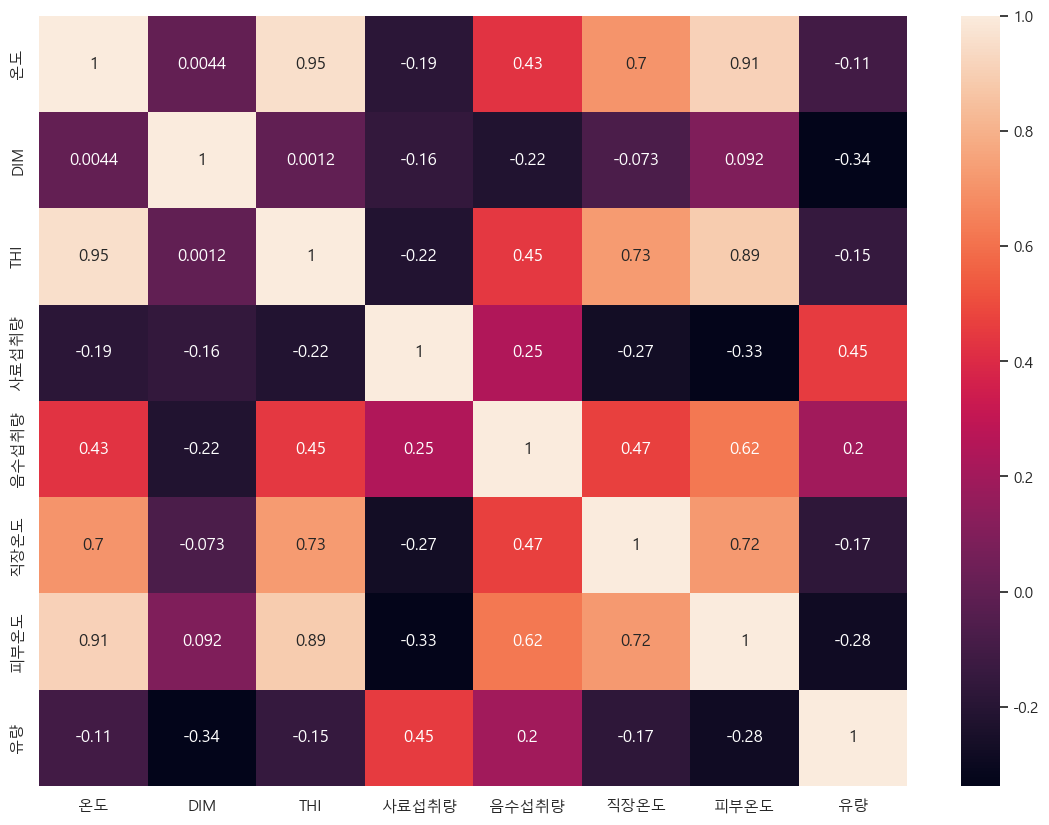

In [7]:
#변수간 Correlation 확인(결측치 제거 이후)
plt.figure(figsize = (14, 10))
sns.heatmap(nor_df.corr(), annot = True)

In [8]:
#변수 구분
x = nor_df.drop(columns = ['유량','온도'], axis =1)
x = x.dropna(axis = 0).reset_index(drop=True)
y = nor_df[['유량']]
# 독립변수 행렬 생성
matrix_x = np.array(x)
#VIF 점수 계산
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF Score'] = [variance_inflation_factor(matrix_x,i) for i in range(matrix_x.shape[1])]

print(vif)

  Features  VIF Score
0      DIM   3.453865
1      THI  12.301715
2    사료섭취량  17.394815
3    음수섭취량  24.041932
4     직장온도  10.234756
5     피부온도  11.889258


In [9]:
#변수 구분
x = nor_df.drop(columns = ['유량','온도','피부온도','음수섭취량'], axis =1)
x = x.dropna(axis=0).reset_index(drop=True)
y = nor_df[['유량']]
# 독립변수 행렬 생성
matrix_x = np.array(x)
#VIF 점수 계산
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF Score'] = [variance_inflation_factor(matrix_x,i) for i in range(matrix_x.shape[1])]

print(vif)

  Features  VIF Score
0      DIM   2.854568
1      THI   5.665115
2    사료섭취량   4.559237
3     직장온도   9.999528


In [10]:
#결측치 제거 (DIM, 직장온도 포함)
df_na = nor_df.dropna(axis=0).reset_index(drop=True)
print(df_na.describe())
x = df_na.drop(columns = ['유량', '온도', '피부온도', '음수섭취량'], axis = 1)
y = df_na[['유량']]

              온도        DIM        THI      사료섭취량      음수섭취량       직장온도  \
count  36.000000  36.000000  36.000000  36.000000  36.000000  36.000000   
mean    0.222222   0.533333   0.191358   0.525873   0.342550   0.313034   
std     0.350600   0.321603   0.339219   0.167539   0.092283   0.227291   
min     0.000000   0.000000   0.000000   0.250374   0.127927   0.000000   
25%     0.000000   0.300000   0.000000   0.406409   0.290420   0.153846   
50%     0.000000   0.550000   0.000000   0.477538   0.337272   0.269231   
75%     0.400000   0.750000   0.166667   0.602576   0.383366   0.355769   
max     1.000000   1.000000   1.000000   0.946391   0.601330   1.000000   

            피부온도         유량  
count  36.000000  36.000000  
mean    0.278595  29.548333  
std     0.221495   4.264195  
min     0.000000  23.420000  
25%     0.088235  26.845000  
50%     0.264706  28.410000  
75%     0.352941  33.170000  
max     0.794118  38.590000  


In [11]:
#결측치 제거 (직장온도 포함,변수 3개)
df_drop = nor_df.drop(columns = ['DIM', '음수섭취량', '온도','피부온도'])
print(df_drop.head())
df_na_1 = df_drop.dropna(axis=0).reset_index(drop=True)
x_1 = df_na_1.drop(columns = ['유량'], axis = 1)
y_1 = df_na_1[['유량']]
print(df_na_1.describe())

        THI     사료섭취량      직장온도     유량
0  0.166667       NaN       NaN  45.88
1  0.166667  0.993711       NaN  41.52
2  0.166667  0.951183       NaN  47.40
3  0.166667  0.920335  0.192308  44.32
4  0.166667  0.897275       NaN  43.78
             THI      사료섭취량       직장온도         유량
count  72.000000  72.000000  72.000000  72.000000
mean    0.369599   0.551795   0.400641  30.894444
std     0.367115   0.199535   0.209944   6.162087
min     0.000000   0.165319   0.000000  18.840000
25%     0.000000   0.402965   0.230769  26.845000
50%     0.222222   0.562294   0.384615  29.890000
75%     0.611111   0.678646   0.538462  34.830000
max     1.000000   0.989518   1.000000  47.330000


In [12]:
#결측치 제거 (직장온도 포함, 변수 2개)
x_2 = df_na_1.drop(columns = ['유량', '사료섭취량'])
y_2 = df_na_1[['유량']]
print(x_2.describe())

             THI       직장온도
count  72.000000  72.000000
mean    0.369599   0.400641
std     0.367115   0.209944
min     0.000000   0.000000
25%     0.000000   0.230769
50%     0.222222   0.384615
75%     0.611111   0.538462
max     1.000000   1.000000


In [13]:
#결측치 제거 (직장온도 제외, 변수 2개)
df_drop_1 = nor_df.drop(columns = ['DIM', '음수섭취량', '온도', '피부온도','직장온도'])
print(df_drop_1.head())
df_na_2 = df_drop_1.dropna(axis=0).reset_index(drop=True)
x_3 = df_na_2.drop(columns = ['유량'], axis = 1)
y_3 = df_na_2[['유량']]
print(df_na_2.describe())

        THI     사료섭취량     유량
0  0.166667       NaN  45.88
1  0.166667  0.993711  41.52
2  0.166667  0.951183  47.40
3  0.166667  0.920335  44.32
4  0.166667  0.897275  43.78
              THI       사료섭취량          유량
count  348.000000  348.000000  348.000000
mean     0.424010    0.504269   30.440420
std      0.386594    0.191926    5.327586
min      0.000000    0.000000   17.940000
25%      0.000000    0.383049   27.030000
50%      0.277778    0.470201   29.385000
75%      0.805556    0.623914   33.660000
max      1.000000    1.000000   47.400000


In [14]:
#결측치 제거 (THI)
df_drop_2 = nor_df[['유량','THI']]
df_na_3 = df_drop_2.dropna(axis=0).reset_index(drop=True)
x_4 = df_na_3[['THI']]
y_4 = df_na_3[['유량']]
print(df_na_3.describe())

               유량         THI
count  362.000000  362.000000
mean    30.518055    0.426028
std      5.494594    0.382384
min     17.940000    0.000000
25%     27.010000    0.000000
50%     29.450000    0.277778
75%     33.735000    0.777778
max     47.400000    1.000000


In [ ]:
#결측치 제거 (DIM, 직장온도 포함, 변수 2개)
df_na = nor_df.dropna(axis=0).reset_index(drop=True)
print(df_na.describe())
x_5 = df_na.drop(columns = ['유량', '온도', '피부온도', '음수섭취량','사료섭취량'], axis = 1)
y_5 = df_na[['유량']]

In [ ]:
#결측치 제거 (DIM만 포함)
df_drop = nor_df.drop(columns = ['온도', '피부온도', '음수섭취량','사료섭취량','직장온도'], axis = 1)
print(df_drop.head())
df_na_1 = df_drop.dropna(axis=0).reset_index(drop=True)
print(df_na_1.describe())
x_6 = df_na_1.drop(columns = ['유량'], axis = 1)
y_6 = df_na_1[['유량']]
print(y_1)

In [15]:
#Data split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size = 0.2, random_state = 42)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_1, y_1, test_size = 0.2, random_state = 42)

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_2, y_2, test_size = 0.2, random_state = 42)

x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x_3, y_3, test_size = 0.2, random_state = 42)

x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(x_4, y_4, test_size = 0.2, random_state = 42)

x_train_6, x_test_6, y_train_6, y_test_6 = train_test_split(x_5, y_5, test_size = 0.2, random_state = 42)

x_train_7, x_test_7, y_train_7, y_test_7 = train_test_split(x_6, y_6, test_size = 0.2, random_state = 42)

# training data set의 인덱스 초기화
x_train_1 = x_train_1.reset_index(drop=True)
y_train_1 = y_train_1.reset_index(drop=True)

x_train_2 = x_train_2.reset_index(drop=True)
y_train_2 = y_train_2.reset_index(drop=True)

x_train_3 = x_train_3.reset_index(drop=True)
y_train_3 = y_train_3.reset_index(drop=True)

x_train_4 = x_train_4.reset_index(drop=True)
y_train_4 = y_train_4.reset_index(drop=True)

x_train_5 = x_train_5.reset_index(drop=True)
y_train_5 = y_train_5.reset_index(drop=True)

x_train_6 = x_train_6.reset_index(drop=True)
y_train_6 = y_train_6.reset_index(drop=True)

x_train_7 = x_train_7.reset_index(drop=True)
y_train_7 = y_train_7.reset_index(drop=True)

In [ ]:
#MLR(machine learning x)
def MLR(x, y):
    model = LinearRegression()
    model.fit(x, y)
    
    # Get coefficients and intercept
    coefficients = model.coef_
    intercept = model.intercept_
    
    MAPE = np.mean(100 * (np.abs(y-model.predict(x))/y))
    accuracy = 100 - MAPE
    # Calculating RMSE
    y_pred = model.predict(x)
    rmse = np.sqrt(np.mean((y - y_pred)**2))
    # Calculating Relative RMSE
    relative_rmse = (rmse / np.mean(y))*100
    # Calculating R-squared
    r2 = r2_score(y, y_pred)
    # Printing the results of the current fold iteration
    print('Coefficient:', coefficients)
    print('Intercept:', intercept)
    print('Accuracy:', accuracy, 'RMSE', rmse, 'RRMSE', relative_rmse, 'r2', r2)

In [ ]:
MLR_1 = MLR(x,y)
print("----------------------------------------------------------------------")
MLR_2 = MLR(x_1,y_1)
print("----------------------------------------------------------------------")
MLR_3 = MLR(x_2,y_2)
print("----------------------------------------------------------------------")
MLR_4 = MLR(x_3,y_3)
print("----------------------------------------------------------------------")
MLR_5 = MLR(x_4,y_4)
print("----------------------------------------------------------------------")
MLR_6 = MLR(x_5,y_5)
print("----------------------------------------------------------------------")
MLR_7 = MLR(x_6,y_6)

In [19]:
def Multiple(x_train, y_train, x_test, y_test, k_fold=10):
    SearchResultsData=pd.DataFrame()
    # Create MLR model
    model = LinearRegression()
     # Perform k-fold cross validation
    kf = KFold(n_splits=k_fold, shuffle=True, random_state = 5)
    fold_number = 1
    for train_index, val_index in kf.split(x_train):
        X_train_fold, X_val_fold = x_train.loc[train_index], x_train.loc[val_index]
        Y_train_fold, Y_val_fold = y_train.loc[train_index], y_train.loc[val_index]
        
        # Fitting MLR to the Training set
        model.fit(X_train_fold, Y_train_fold)
        
        # Get coefficients and intercept
        coefficients = model.coef_
        intercept = model.intercept_
        
        MAPE_val = np.mean(100 * (np.abs(Y_val_fold-model.predict(X_val_fold))/Y_val_fold))
        MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))
        accuracy_val = 100 - MAPE_val
        accuracy = 100 - MAPE
        # Calculating RMSE
        y_pred_val = model.predict(X_val_fold)
        y_pred = model.predict(x_test)
        rmse_val = np.sqrt(np.mean((Y_val_fold - y_pred_val)**2))
        rmse = np.sqrt(np.mean((y_test - y_pred)**2))
        # Calculating Relative RMSE
        relative_rmse_val = (rmse_val / np.mean(Y_val_fold))*100
        relative_rmse = (rmse / np.mean(y_test))*100
        # Calculating R-squared
        r2_val = r2_score(Y_val_fold, y_pred_val)
        r2_test = r2_score(y_test, y_pred)
        # Printing the results of the current fold iteration
        print('Fold:', fold_number)
        print('Coefficient:', coefficients)
        print('Intercept:', intercept)
        print('Accuracy_val:', accuracy_val,'accuracy_test',accuracy, 'RMSE_val:', rmse_val, 'RRMSE_val',
              relative_rmse_val, 'RMSE_test', rmse, 'RRMSE_test', relative_rmse, 'R2_val', r2_val, 'r2_test', r2_test)
        fold_number += 1
        # Appending the results to the dataframe
        SearchResultsData = pd.concat([SearchResultsData,
                                       pd.DataFrame(data=[[fold_number,coefficients, intercept, accuracy_val, accuracy, rmse_val,
                                                           relative_rmse_val, rmse, relative_rmse]],
                                                    columns=['Fold', 'Coefficients', 'intercept', 'Accuracy_val', 'Accuracy_test', 'RMSE_val',
                                                             'RRMSE_val', 'RMSE_test', 'RRMSE_test'])])
    
    return(SearchResultsData)

In [20]:
#Calling the function
MLR_1 = Multiple(x_train_1, y_train_1, x_test_1, y_test_1, k_fold=10)
MLR_1.to_excel('MLR1.xlsx', index=False)
#Calling the function
MLR_2 = Multiple(x_train_2, y_train_2, x_test_2, y_test_2, k_fold=10)
MLR_2.to_excel('MLR2.xlsx', index=False)
#Calling the function
MLR_3 = Multiple(x_train_3, y_train_3, x_test_3, y_test_3, k_fold=10)
MLR_3.to_excel('MLR3.xlsx', index=False)
#Calling the function
MLR_4 = Multiple(x_train_4, y_train_4, x_test_4, y_test_4, k_fold=10)
MLR_4.to_excel('MLR4.xlsx', index=False)
#Calling the function
MLR_5 = Multiple(x_train_5, y_train_5, x_test_5, y_test_5, k_fold=10)
MLR_5.to_excel('MLR5.xlsx', index=False)

Fold: 1
Coefficient: [[ -3.43874388   6.54472704  13.84319197 -10.91620512]]
Intercept: [26.13959453]
Accuracy_val: 유량    91.940315
dtype: float64 accuracy_test 유량    94.015713
dtype: float64 RMSE_val: 유량    2.926625
dtype: float64 RRMSE_val 유량    9.67586
dtype: float64 RMSE_test 유량    2.07653
dtype: float64 RRMSE_test 유량    7.141057
dtype: float64 R2_val 0.6493773275801105 r2_test 0.6399397702585203
Fold: 2
Coefficient: [[ -2.24801336   7.95640398  14.53721916 -13.02637855]]
Intercept: [25.63679438]
Accuracy_val: 유량    94.340104
dtype: float64 accuracy_test 유량    93.618321
dtype: float64 RMSE_val: 유량    2.3558
dtype: float64 RRMSE_val 유량    7.708771
dtype: float64 RMSE_test 유량    2.234878
dtype: float64 RRMSE_test 유량    7.685605
dtype: float64 R2_val 0.39973657255922124 r2_test 0.5829325200390942
Fold: 3
Coefficient: [[ -2.00735451   8.1353126   12.73949936 -13.62279899]]
Intercept: [26.42097685]
Accuracy_val: 유량    91.848616
dtype: float64 accuracy_test 유량    93.653082
dtype: float64

Fold: 5
Coefficient: [[-5.57775821  5.68477371]]
Intercept: [30.30462026]
Accuracy_val: 유량    82.955177
dtype: float64 accuracy_test 유량    86.058666
dtype: float64 RMSE_val: 유량    7.983928
dtype: float64 RRMSE_val 유량    24.587368
dtype: float64 RMSE_test 유량    5.329689
dtype: float64 RRMSE_test 유량    16.629988
dtype: float64 R2_val -0.06722056880739657 r2_test -0.07098980265004218
Fold: 6
Coefficient: [[-6.02422424  3.49666826]]
Intercept: [31.67225666]
Accuracy_val: 유량    87.297168
dtype: float64 accuracy_test 유량    86.314608
dtype: float64 RMSE_val: 유량    4.496432
dtype: float64 RRMSE_val 유량    14.954873
dtype: float64 RMSE_test 유량    5.162787
dtype: float64 RRMSE_test 유량    16.109211
dtype: float64 R2_val -0.588967591653164 r2_test -0.004962842411041057
Fold: 7
Coefficient: [[-3.20816043  1.86618449]]
Intercept: [30.97141585]
Accuracy_val: 유량    79.171482
dtype: float64 accuracy_test 유량    86.291901
dtype: float64 RMSE_val: 유량    7.198748
dtype: float64 RRMSE_val 유량    22.827805
dty

Fold: 8
Coefficient: [[-2.5488913]]
Intercept: [31.37418482]
Accuracy_val: 유량    86.666897
dtype: float64 accuracy_test 유량    86.125699
dtype: float64 RMSE_val: 유량    4.725023
dtype: float64 RRMSE_val 유량    16.05663
dtype: float64 RMSE_test 유량    5.767652
dtype: float64 RRMSE_test 유량    18.080367
dtype: float64 R2_val -0.13569897229194905 r2_test -0.06467909013468787
Fold: 9
Coefficient: [[-1.96907311]]
Intercept: [30.93961486]
Accuracy_val: 유량    87.396514
dtype: float64 accuracy_test 유량    86.131524
dtype: float64 RMSE_val: 유량    5.204562
dtype: float64 RRMSE_val 유량    16.943454
dtype: float64 RMSE_test 유량    5.818925
dtype: float64 RRMSE_test 유량    18.241098
dtype: float64 R2_val 0.042757401251734994 r2_test -0.08369274572400398
Fold: 10
Coefficient: [[-2.36844253]]
Intercept: [31.10070102]
Accuracy_val: 유량    86.04541
dtype: float64 accuracy_test 유량    86.096007
dtype: float64 RMSE_val: 유량    5.435828
dtype: float64 RRMSE_val 유량    17.479348
dtype: float64 RMSE_test 유량    5.822842


In [22]:
import kerastuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu', input_shape=(x_train_1.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [23]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=5,
    directory='my_dir_3',
    project_name='ANN_final_model_1')

tuner.search(x_train_1, y_train_1, epochs=10, validation_data=(x_test_1, y_test_1))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal number of layers is {best_hps.get('num_layers')}.
""")


Reloading Tuner from my_dir_3\ANN_final_model_1\tuner0.json

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 480 and the optimal number of layers is 5.



In [24]:
#layer 별 노드개수(model1)
print("layer 1:", best_hps.get('units_0'), "layer 2", best_hps.get("units_1"), "layer 3", best_hps.get("units_2"),
      "layer 4", best_hps.get("units_3"), "layer 5", best_hps.get("units_4"))

layer 1: 320 layer 2 512 layer 3 256 layer 4 480 layer 5 32


In [19]:
# Defining a function to find the best parameters for ANN and obtain results for the training dataset
def FunctionFindBestParams_1(x_train, y_train, x_test, y_test, k_fold=10):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20, 25, 30, 35]
    epoch_list  =   [5, 10, 50, 100, 250, 500]
    
    SearchResultsData=pd.DataFrame()
    
    # Initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            model = tuner.hypermodel.build(best_hps)
            # Perform k-fold cross validation
            kf = KFold(n_splits=k_fold, shuffle=True, random_state = 5)
            fold_number = 1
            for train_index, val_index in kf.split(x_train):
                X_train_fold, X_val_fold = x_train.loc[train_index], x_train.loc[val_index]
                Y_train_fold, Y_val_fold = y_train.loc[train_index], y_train.loc[val_index]
                
                # Fitting the ANN to the Training set
                model.fit(X_train_fold, Y_train_fold ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
                MAPE_val = np.mean(100 * (np.abs(Y_val_fold-model.predict(X_val_fold))/Y_val_fold))
                MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))
                accuracy_val = 100 - MAPE_val
                accuracy = 100 - MAPE
                # Calculating RMSE
                y_pred_val = model.predict(X_val_fold)
                y_pred = model.predict(x_test)
                rmse_val = np.sqrt(np.mean((Y_val_fold - y_pred_val)**2))
                rmse = np.sqrt(np.mean((y_test - y_pred)**2))
                # Calculating Relative RMSE
                relative_rmse_val = (rmse_val / np.mean(Y_val_fold))*100
                relative_rmse = (rmse / np.mean(y_test))*100
                # Calculating R-squared
                r2_val = r2_score(Y_val_fold, y_pred_val)
                r2_test = r2_score(y_test, y_pred)
                # Printing the results of the current fold iteration
                print('Fold:', fold_number, 'TrialNumber:', TrialNumber, 'Parameters:', 'batch_size:',
                      batch_size_trial, '-', 'epochs:', epochs_trial, 'Accuracy_val:', accuracy_val,
                      'accuracy_test',accuracy, 'RMSE_val:', rmse_val, 'RRMSE_val', relative_rmse_val,
                      'RMSE_test', rmse, 'RRMSE_test', relative_rmse, 'R2_val', r2_val, 'r2_test', r2_test)
                
                fold_number += 1
            
            
                # Appending the results to the dataframe
                SearchResultsData = pd.concat([SearchResultsData,
                                               pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial),
                                                                   accuracy_val, accuracy, rmse_val, relative_rmse_val, rmse,
                                                                   relative_rmse]],
                                                            columns=['TrialNumber', 'Parameters', 'Accuracy_val', 'Accuracy_test',
                                                                     'RMSE_val', 'RRMSE_val', 'RMSE_test', 'RRMSE_test'])])
                
    return(SearchResultsData)



In [20]:
# Calling the function
ANN_1 = FunctionFindBestParams_1(x_train_1, y_train_1, x_test_1, y_test_1, k_fold=10)
ANN_1.to_excel('ANN_Final_1.xlsx', index=False)


1/1 [==============================] - 0s 22ms/step
Fold: 1 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    75.847325
dtype: float64 accuracy_test 유량    85.032631
dtype: float64 RMSE_val: 유량    7.36641
dtype: float64 RRMSE_val 유량    24.354452
dtype: float64 RMSE_test 유량    5.707432
dtype: float64 RRMSE_test 유량    19.627503
dtype: float64 R2_val -1.2213527315026136 r2_test -1.7200710621398243
1/1 [==============================] - 0s 22ms/step
Fold: 2 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    84.269888
dtype: float64 accuracy_test 유량    88.960213
dtype: float64 RMSE_val: 유량    5.073152
dtype: float64 RRMSE_val 유량    16.600628
dtype: float64 RMSE_test 유량    3.782389
dtype: float64 RRMSE_test 유량    13.007398
dtype: float64 R2_val -1.7836884575743293 r2_test -0.19462334427752448
1/1 [==============================] - 0s 19ms/step
Fold: 3 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    85.69518
dtype: float64 a

1/1 [==============================] - 0s 26ms/step
Fold: 10 TrialNumber: 3 Parameters: batch_size: 5 - epochs: 50 Accuracy_val: 유량    90.996525
dtype: float64 accuracy_test 유량    84.494892
dtype: float64 RMSE_val: 유량    3.17035
dtype: float64 RRMSE_val 유량    10.557275
dtype: float64 RMSE_test 유량    5.266294
dtype: float64 RRMSE_test 유량    18.110455
dtype: float64 R2_val 0.10437813054799439 r2_test -1.31584191259592
1/1 [==============================] - 0s 23ms/step
Fold: 1 TrialNumber: 4 Parameters: batch_size: 5 - epochs: 100 Accuracy_val: 유량    92.888479
dtype: float64 accuracy_test 유량    83.184755
dtype: float64 RMSE_val: 유량    2.396001
dtype: float64 RRMSE_val 유량    7.921537
dtype: float64 RMSE_test 유량    5.712166
dtype: float64 RRMSE_test 유량    19.64378
dtype: float64 R2_val 0.7649935711796234 r2_test -1.7245845137455174
1/1 [==============================] - 0s 22ms/step
Fold: 2 TrialNumber: 4 Parameters: batch_size: 5 - epochs: 100 Accuracy_val: 유량    97.455076
dtype: float64 

1/1 [==============================] - 0s 40ms/step
Fold: 9 TrialNumber: 6 Parameters: batch_size: 5 - epochs: 500 Accuracy_val: 유량    96.98416
dtype: float64 accuracy_test 유량    91.931622
dtype: float64 RMSE_val: 유량    0.918271
dtype: float64 RRMSE_val 유량    3.595424
dtype: float64 RMSE_test 유량    2.830213
dtype: float64 RRMSE_test 유량    9.732926
dtype: float64 R2_val 0.5441055694354331 r2_test 0.3311372045877059
1/1 [==============================] - 0s 21ms/step
Fold: 10 TrialNumber: 6 Parameters: batch_size: 5 - epochs: 500 Accuracy_val: 유량    97.565533
dtype: float64 accuracy_test 유량    89.918264
dtype: float64 RMSE_val: 유량    1.002118
dtype: float64 RRMSE_val 유량    3.337056
dtype: float64 RMSE_test 유량    3.457736
dtype: float64 RRMSE_test 유량    11.890938
dtype: float64 R2_val 0.9105154539797863 r2_test 0.001651003221660119
1/1 [==============================] - 0s 22ms/step
Fold: 1 TrialNumber: 7 Parameters: batch_size: 10 - epochs: 5 Accuracy_val: 유량    57.004377
dtype: float64 

Fold: 7 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    95.478719
dtype: float64 accuracy_test 유량    88.255696
dtype: float64 RMSE_val: 유량    2.691855
dtype: float64 RRMSE_val 유량    8.395431
dtype: float64 RMSE_test 유량    3.771302
dtype: float64 RRMSE_test 유량    12.96927
dtype: float64 R2_val 0.8104761314842317 r2_test -0.1876302408197723
1/1 [==============================] - 0s 24ms/step
Fold: 8 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    97.701868
dtype: float64 accuracy_test 유량    88.52035
dtype: float64 RMSE_val: 유량    0.899091
dtype: float64 RRMSE_val 유량    3.17775
dtype: float64 RMSE_test 유량    3.69465
dtype: float64 RRMSE_test 유량    12.705672
dtype: float64 R2_val 0.9681887404279618 r2_test -0.1398439811326193
1/1 [==============================] - 0s 26ms/step
Fold: 9 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    95.449525
dtype: float64 accuracy_test 유량    88.825321
dtype: float64 RMSE_val:

1/1 [==============================] - 0s 23ms/step
Fold: 2 TrialNumber: 11 Parameters: batch_size: 10 - epochs: 250 Accuracy_val: 유량    94.355454
dtype: float64 accuracy_test 유량    85.779612
dtype: float64 RMSE_val: 유량    2.025044
dtype: float64 RRMSE_val 유량    6.626452
dtype: float64 RMSE_test 유량    4.583948
dtype: float64 RRMSE_test 유량    15.763909
dtype: float64 R2_val 0.5564590949848232 r2_test -0.75459941802772
1/1 [==============================] - 0s 22ms/step
Fold: 3 TrialNumber: 11 Parameters: batch_size: 10 - epochs: 250 Accuracy_val: 유량    91.553645
dtype: float64 accuracy_test 유량    85.476303
dtype: float64 RMSE_val: 유량    2.785128
dtype: float64 RRMSE_val 유량    8.39231
dtype: float64 RMSE_test 유량    4.709472
dtype: float64 RRMSE_test 유량    16.195581
dtype: float64 R2_val 0.5438550437017053 r2_test -0.8520094828357709
1/1 [==============================] - 0s 39ms/step
Fold: 4 TrialNumber: 11 Parameters: batch_size: 10 - epochs: 250 Accuracy_val: 유량    89.690052
dtype: flo

1/1 [==============================] - 0s 43ms/step
Fold: 10 TrialNumber: 13 Parameters: batch_size: 15 - epochs: 5 Accuracy_val: 유량    86.764915
dtype: float64 accuracy_test 유량    90.793815
dtype: float64 RMSE_val: 유량    3.923703
dtype: float64 RRMSE_val 유량    13.065945
dtype: float64 RMSE_test 유량    3.43112
dtype: float64 RRMSE_test 유량    11.799405
dtype: float64 R2_val -0.37183765967394566 r2_test 0.016961808983086635
1/1 [==============================] - 0s 55ms/step
Fold: 1 TrialNumber: 14 Parameters: batch_size: 15 - epochs: 10 Accuracy_val: 유량    74.526636
dtype: float64 accuracy_test 유량    72.698597
dtype: float64 RMSE_val: 유량    10.24784
dtype: float64 RRMSE_val 유량    33.880891
dtype: float64 RMSE_test 유량    9.514041
dtype: float64 RRMSE_test 유량    32.71819
dtype: float64 R2_val -3.2990297548975525 r2_test -6.558379590514476
1/1 [==============================] - 0s 25ms/step
Fold: 2 TrialNumber: 14 Parameters: batch_size: 15 - epochs: 10 Accuracy_val: 유량    84.40629
dtype: f

1/1 [==============================] - 0s 51ms/step
Fold: 9 TrialNumber: 16 Parameters: batch_size: 15 - epochs: 100 Accuracy_val: 유량    95.579716
dtype: float64 accuracy_test 유량    87.697991
dtype: float64 RMSE_val: 유량    1.204504
dtype: float64 RRMSE_val 유량    4.716148
dtype: float64 RMSE_test 유량    3.969954
dtype: float64 RRMSE_test 유량    13.652421
dtype: float64 R2_val 0.2155976139975324 r2_test -0.3160413609493098
1/1 [==============================] - 0s 35ms/step
Fold: 10 TrialNumber: 16 Parameters: batch_size: 15 - epochs: 100 Accuracy_val: 유량    98.955271
dtype: float64 accuracy_test 유량    87.645197
dtype: float64 RMSE_val: 유량    0.319289
dtype: float64 RRMSE_val 유량    1.063234
dtype: float64 RMSE_test 유량    4.058747
dtype: float64 RRMSE_test 유량    13.957776
dtype: float64 R2_val 0.9909159667704207 r2_test -0.3755697397640503
1/1 [==============================] - 0s 23ms/step
Fold: 1 TrialNumber: 17 Parameters: batch_size: 15 - epochs: 250 Accuracy_val: 유량    85.885216
dtype:

1/1 [==============================] - 0s 33ms/step
Fold: 7 TrialNumber: 19 Parameters: batch_size: 20 - epochs: 5 Accuracy_val: 유량    85.00776
dtype: float64 accuracy_test 유량    88.771278
dtype: float64 RMSE_val: 유량    5.074899
dtype: float64 RRMSE_val 유량    15.827735
dtype: float64 RMSE_test 유량    4.154708
dtype: float64 RRMSE_test 유량    14.28778
dtype: float64 R2_val 0.3263792276500036 r2_test -0.4413838247334114
1/1 [==============================] - 0s 31ms/step
Fold: 8 TrialNumber: 19 Parameters: batch_size: 20 - epochs: 5 Accuracy_val: 유량    92.048782
dtype: float64 accuracy_test 유량    90.566632
dtype: float64 RMSE_val: 유량    2.799105
dtype: float64 RRMSE_val 유량    9.893161
dtype: float64 RMSE_test 유량    3.480588
dtype: float64 RRMSE_test 유량    11.969523
dtype: float64 R2_val 0.6916729312934622 r2_test -0.011588451162481084
1/1 [==============================] - 0s 37ms/step
Fold: 9 TrialNumber: 19 Parameters: batch_size: 20 - epochs: 5 Accuracy_val: 유량    80.487216
dtype: float

1/1 [==============================] - 0s 41ms/step
Fold: 6 TrialNumber: 22 Parameters: batch_size: 20 - epochs: 100 Accuracy_val: 유량    92.58072
dtype: float64 accuracy_test 유량    87.523631
dtype: float64 RMSE_val: 유량    2.421155
dtype: float64 RRMSE_val 유량    8.461632
dtype: float64 RMSE_test 유량    3.995258
dtype: float64 RRMSE_test 유량    13.739443
dtype: float64 R2_val -0.5912796146424899 r2_test -0.33287191718619225
1/1 [==============================] - 0s 21ms/step
Fold: 7 TrialNumber: 22 Parameters: batch_size: 20 - epochs: 100 Accuracy_val: 유량    96.071443
dtype: float64 accuracy_test 유량    86.319756
dtype: float64 RMSE_val: 유량    1.887363
dtype: float64 RRMSE_val 유량    5.88636
dtype: float64 RMSE_test 유량    4.366601
dtype: float64 RRMSE_test 유량    15.016469
dtype: float64 R2_val 0.9068309801047245 r2_test -0.5921566849400379
1/1 [==============================] - 0s 22ms/step
Fold: 8 TrialNumber: 22 Parameters: batch_size: 20 - epochs: 100 Accuracy_val: 유량    92.718939
dtype: 

1/1 [==============================] - 0s 21ms/step
Fold: 4 TrialNumber: 25 Parameters: batch_size: 25 - epochs: 5 Accuracy_val: 유량    67.502323
dtype: float64 accuracy_test 유량    73.577356
dtype: float64 RMSE_val: 유량    10.047239
dtype: float64 RRMSE_val 유량    33.313126
dtype: float64 RMSE_test 유량    9.280224
dtype: float64 RRMSE_test 유량    31.914109
dtype: float64 R2_val -10.500175316295534 r2_test -6.191435736134165
1/1 [==============================] - 0s 27ms/step
Fold: 5 TrialNumber: 25 Parameters: batch_size: 25 - epochs: 5 Accuracy_val: 유량    74.282155
dtype: float64 accuracy_test 유량    88.17994
dtype: float64 RMSE_val: 유량    6.988297
dtype: float64 RRMSE_val 유량    26.011032
dtype: float64 RMSE_test 유량    4.516735
dtype: float64 RRMSE_test 유량    15.53277
dtype: float64 R2_val -21.594520267244555 r2_test -0.7035229748753711
1/1 [==============================] - 0s 34ms/step
Fold: 6 TrialNumber: 25 Parameters: batch_size: 25 - epochs: 5 Accuracy_val: 유량    85.91371
dtype: float

1/1 [==============================] - 0s 41ms/step
Fold: 9 TrialNumber: 26 Parameters: batch_size: 25 - epochs: 10 Accuracy_val: 유량    81.279105
dtype: float64 accuracy_test 유량    90.808695
dtype: float64 RMSE_val: 유량    4.765562
dtype: float64 RRMSE_val 유량    18.65921
dtype: float64 RMSE_test 유량    3.544721
dtype: float64 RRMSE_test 유량    12.190074
dtype: float64 R2_val -11.278645379441977 r2_test -0.04921108087175896
1/1 [==============================] - 0s 20ms/step
Fold: 10 TrialNumber: 26 Parameters: batch_size: 25 - epochs: 10 Accuracy_val: 유량    89.806951
dtype: float64 accuracy_test 유량    88.448613
dtype: float64 RMSE_val: 유량    4.710348
dtype: float64 RRMSE_val 유량    15.685474
dtype: float64 RMSE_test 유량    4.383791
dtype: float64 RRMSE_test 유량    15.075583
dtype: float64 R2_val -0.9770441476977636 r2_test -0.6047168045408671
1/1 [==============================] - 0s 27ms/step
Fold: 1 TrialNumber: 27 Parameters: batch_size: 25 - epochs: 50 Accuracy_val: 유량    92.195983
dtype

1/1 [==============================] - 0s 22ms/step
Fold: 7 TrialNumber: 29 Parameters: batch_size: 25 - epochs: 250 Accuracy_val: 유량    96.879885
dtype: float64 accuracy_test 유량    88.353924
dtype: float64 RMSE_val: 유량    1.133165
dtype: float64 RRMSE_val 유량    3.534147
dtype: float64 RMSE_test 유량    4.311949
dtype: float64 RRMSE_test 유량    14.828523
dtype: float64 R2_val 0.9664148605475354 r2_test -0.5525512845790164
1/1 [==============================] - 0s 22ms/step
Fold: 8 TrialNumber: 29 Parameters: batch_size: 25 - epochs: 250 Accuracy_val: 유량    97.575581
dtype: float64 accuracy_test 유량    88.035299
dtype: float64 RMSE_val: 유량    0.710424
dtype: float64 RRMSE_val 유량    2.510923
dtype: float64 RMSE_test 유량    4.502568
dtype: float64 RRMSE_test 유량    15.484051
dtype: float64 R2_val 0.9801386621286772 r2_test -0.6928533784474553
1/1 [==============================] - 0s 21ms/step
Fold: 9 TrialNumber: 29 Parameters: batch_size: 25 - epochs: 250 Accuracy_val: 유량    89.371783
dtype: 

1/1 [==============================] - 0s 46ms/step
Fold: 6 TrialNumber: 32 Parameters: batch_size: 30 - epochs: 10 Accuracy_val: 유량    92.127951
dtype: float64 accuracy_test 유량    90.360927
dtype: float64 RMSE_val: 유량    2.479064
dtype: float64 RRMSE_val 유량    8.664018
dtype: float64 RMSE_test 유량    3.955051
dtype: float64 RRMSE_test 유량    13.601172
dtype: float64 R2_val -0.668310524792493 r2_test -0.3061794809926843
1/1 [==============================] - 0s 29ms/step
Fold: 7 TrialNumber: 32 Parameters: batch_size: 30 - epochs: 10 Accuracy_val: 유량    83.226997
dtype: float64 accuracy_test 유량    91.023028
dtype: float64 RMSE_val: 유량    5.799709
dtype: float64 RRMSE_val 유량    18.08829
dtype: float64 RMSE_test 유량    3.473789
dtype: float64 RRMSE_test 유량    11.946142
dtype: float64 R2_val 0.12022228898075205 r2_test -0.007640190417537607
1/1 [==============================] - 0s 46ms/step
Fold: 8 TrialNumber: 32 Parameters: batch_size: 30 - epochs: 10 Accuracy_val: 유량    92.396173
dtype: 

1/1 [==============================] - 0s 23ms/step
Fold: 4 TrialNumber: 35 Parameters: batch_size: 30 - epochs: 250 Accuracy_val: 유량    90.681751
dtype: float64 accuracy_test 유량    86.073982
dtype: float64 RMSE_val: 유량    4.177495
dtype: float64 RRMSE_val 유량    13.85111
dtype: float64 RMSE_test 유량    4.703041
dtype: float64 RRMSE_test 유량    16.173463
dtype: float64 R2_val -0.9881210787505041 r2_test -0.8469544883079894
1/1 [==============================] - 0s 27ms/step
Fold: 5 TrialNumber: 35 Parameters: batch_size: 30 - epochs: 250 Accuracy_val: 유량    96.324
dtype: float64 accuracy_test 유량    85.04899
dtype: float64 RMSE_val: 유량    1.183615
dtype: float64 RRMSE_val 유량    4.405515
dtype: float64 RMSE_test 유량    4.944711
dtype: float64 RRMSE_test 유량    17.004552
dtype: float64 R2_val 0.3518412024367189 r2_test -1.0416465949721445
1/1 [==============================] - 0s 34ms/step
Fold: 6 TrialNumber: 35 Parameters: batch_size: 30 - epochs: 250 Accuracy_val: 유량    97.33693
dtype: floa

1/1 [==============================] - 0s 21ms/step
Fold: 3 TrialNumber: 38 Parameters: batch_size: 35 - epochs: 10 Accuracy_val: 유량    80.322705
dtype: float64 accuracy_test 유량    85.234647
dtype: float64 RMSE_val: 유량    6.540014
dtype: float64 RRMSE_val 유량    19.706751
dtype: float64 RMSE_test 유량    5.145813
dtype: float64 RRMSE_test 유량    17.696128
dtype: float64 R2_val -1.5151848475210157 r2_test -1.2110912839005512
1/1 [==============================] - 0s 24ms/step
Fold: 4 TrialNumber: 38 Parameters: batch_size: 35 - epochs: 10 Accuracy_val: 유량    79.069141
dtype: float64 accuracy_test 유량    90.235148
dtype: float64 RMSE_val: 유량    6.814972
dtype: float64 RRMSE_val 유량    22.59606
dtype: float64 RMSE_test 유량    4.069712
dtype: float64 RRMSE_test 유량    13.995483
dtype: float64 R2_val -4.291016607725056 r2_test -0.38301206473168414
1/1 [==============================] - 0s 40ms/step
Fold: 5 TrialNumber: 38 Parameters: batch_size: 35 - epochs: 10 Accuracy_val: 유량    75.723504
dtype: 

1/1 [==============================] - 0s 24ms/step
Fold: 1 TrialNumber: 41 Parameters: batch_size: 35 - epochs: 250 Accuracy_val: 유량    85.198551
dtype: float64 accuracy_test 유량    76.931665
dtype: float64 RMSE_val: 유량    4.28994
dtype: float64 RRMSE_val 유량    14.183184
dtype: float64 RMSE_test 유량    8.104323
dtype: float64 RRMSE_test 유량    27.870258
dtype: float64 R2_val 0.24663005634345192 r2_test -4.484438070818955
1/1 [==============================] - 0s 25ms/step
Fold: 2 TrialNumber: 41 Parameters: batch_size: 35 - epochs: 250 Accuracy_val: 유량    93.497673
dtype: float64 accuracy_test 유량    90.224333
dtype: float64 RMSE_val: 유량    2.032949
dtype: float64 RRMSE_val 유량    6.652321
dtype: float64 RMSE_test 유량    3.240335
dtype: float64 RRMSE_test 유량    11.143309
dtype: float64 R2_val 0.5529892149521497 r2_test 0.12324441292237753
1/1 [==============================] - 0s 25ms/step
Fold: 3 TrialNumber: 41 Parameters: batch_size: 35 - epochs: 250 Accuracy_val: 유량    92.279037
dtype: 

In [17]:
def build_model_2(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu', input_shape=(x_train_2.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [18]:
tuner2 = kt.RandomSearch(
    build_model_2,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=5,
    directory='my_dir_3',
    project_name='ANN_final_model_2')

tuner2.search(x_train_2, y_train_2, epochs=10, validation_data=(x_test_2, y_test_2))

# Get the optimal hyperparameters
best_hps_2 = tuner2.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_2.get('units')} and the optimal number of layers is {best_hps_2.get('num_layers')}.
""")


Reloading Tuner from my_dir_3\ANN_final_model_2\tuner0.json

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 512 and the optimal number of layers is 4.



In [19]:
#layer 별 노드개수(model1)
print("layer 1:", best_hps_2.get('units_0'), "layer 2", best_hps_2.get("units_1"), "layer 3", best_hps_2.get("units_2"),
      "layer 4", best_hps_2.get("units_3"))

layer 1: 288 layer 2 160 layer 3 256 layer 4 416


In [20]:
# Defining a function to find the best parameters for ANN and obtain results for the training dataset
def FunctionFindBestParams_2(x_train, y_train, x_test, y_test, k_fold=10):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20, 25, 30, 35]
    epoch_list  =   [5, 10, 50, 100, 250, 500]
    
    SearchResultsData=pd.DataFrame()
    
    # Initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            model = tuner2.hypermodel.build(best_hps_2)
            # Perform k-fold cross validation
            kf = KFold(n_splits=k_fold, shuffle=True, random_state = 5)
            fold_number = 1
            for train_index, val_index in kf.split(x_train):
                X_train_fold, X_val_fold = x_train.loc[train_index], x_train.loc[val_index]
                Y_train_fold, Y_val_fold = y_train.loc[train_index], y_train.loc[val_index]
                
                # Fitting the ANN to the Training set
                model.fit(X_train_fold, Y_train_fold ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
                MAPE_val = np.mean(100 * (np.abs(Y_val_fold-model.predict(X_val_fold))/Y_val_fold))
                MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))
                accuracy_val = 100 - MAPE_val
                accuracy = 100 - MAPE
                # Calculating RMSE
                y_pred_val = model.predict(X_val_fold)
                y_pred = model.predict(x_test)
                rmse_val = np.sqrt(np.mean((Y_val_fold - y_pred_val)**2))
                rmse = np.sqrt(np.mean((y_test - y_pred)**2))
                # Calculating Relative RMSE
                relative_rmse_val = (rmse_val / np.mean(Y_val_fold))*100
                relative_rmse = (rmse / np.mean(y_test))*100
                # Calculating R-squared
                r2_val = r2_score(Y_val_fold, y_pred_val)
                r2_test = r2_score(y_test, y_pred)
                # Printing the results of the current fold iteration
                print('Fold:', fold_number, 'TrialNumber:', TrialNumber, 'Parameters:', 'batch_size:',
                      batch_size_trial, '-', 'epochs:', epochs_trial, 'Accuracy_val:', accuracy_val,
                      'accuracy_test',accuracy, 'RMSE_val:', rmse_val, 'RRMSE_val', relative_rmse_val,
                      'RMSE_test', rmse, 'RRMSE_test', relative_rmse, 'R2_val', r2_val, 'r2_test', r2_test)
                
                fold_number += 1
            
            
                # Appending the results to the dataframe
                SearchResultsData = pd.concat([SearchResultsData,
                                               pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial),
                                                                   accuracy_val, accuracy, rmse_val, relative_rmse_val, rmse,
                                                                   relative_rmse]],
                                                            columns=['TrialNumber', 'Parameters', 'Accuracy_val', 'Accuracy_test',
                                                                     'RMSE_val', 'RRMSE_val', 'RMSE_test', 'RRMSE_test'])])
                
    return(SearchResultsData)



In [21]:
# Calling the function
ANN_2 = FunctionFindBestParams_2(x_train_2, y_train_2, x_test_2, y_test_2, k_fold=10)
ANN_2.to_excel('ANN_Final_2.xlsx', index=False)

1/1 [==============================] - 0s 31ms/step
Fold: 1 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    79.16679
dtype: float64 accuracy_test 유량    83.420441
dtype: float64 RMSE_val: 유량    9.238461
dtype: float64 RRMSE_val 유량    28.972802
dtype: float64 RMSE_test 유량    7.54365
dtype: float64 RRMSE_test 유량    23.538108
dtype: float64 R2_val -1.8137281780733314 r2_test -1.145579325664463
1/1 [==============================] - 0s 36ms/step
Fold: 2 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    90.69163
dtype: float64 accuracy_test 유량    87.149453
dtype: float64 RMSE_val: 유량    3.575237
dtype: float64 RRMSE_val 유량    11.826133
dtype: float64 RMSE_test 유량    5.898634
dtype: float64 RRMSE_test 유량    18.405239
dtype: float64 R2_val 0.7066881133207377 r2_test -0.3118505842460768
1/1 [==============================] - 0s 27ms/step
Fold: 3 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    82.27097
dtype: float64 accura

1/1 [==============================] - 0s 39ms/step
Fold: 10 TrialNumber: 3 Parameters: batch_size: 5 - epochs: 50 Accuracy_val: 유량    92.35383
dtype: float64 accuracy_test 유량    88.400173
dtype: float64 RMSE_val: 유량    3.097101
dtype: float64 RRMSE_val 유량    10.2764
dtype: float64 RMSE_test 유량    5.493772
dtype: float64 RRMSE_test 유량    17.141967
dtype: float64 R2_val 0.2729436312100534 r2_test -0.13794887227228503
1/1 [==============================] - 0s 29ms/step
Fold: 1 TrialNumber: 4 Parameters: batch_size: 5 - epochs: 100 Accuracy_val: 유량    86.070431
dtype: float64 accuracy_test 유량    86.015018
dtype: float64 RMSE_val: 유량    6.781278
dtype: float64 RRMSE_val 유량    21.266813
dtype: float64 RMSE_test 유량    5.670026
dtype: float64 RRMSE_test 유량    17.691924
dtype: float64 R2_val -0.5160235314111181 r2_test -0.21213667729638597
1/1 [==============================] - 0s 35ms/step
Fold: 2 TrialNumber: 4 Parameters: batch_size: 5 - epochs: 100 Accuracy_val: 유량    68.50728
dtype: float

1/1 [==============================] - 0s 30ms/step
Fold: 4 TrialNumber: 5 Parameters: batch_size: 5 - epochs: 250 Accuracy_val: 유량    93.303103
dtype: float64 accuracy_test 유량    84.538801
dtype: float64 RMSE_val: 유량    2.717822
dtype: float64 RRMSE_val 유량    8.489214
dtype: float64 RMSE_test 유량    6.845445
dtype: float64 RRMSE_test 유량    21.359531
dtype: float64 R2_val 0.8200811235608766 r2_test -0.7667898781259213
1/1 [==============================] - 0s 32ms/step
Fold: 5 TrialNumber: 5 Parameters: batch_size: 5 - epochs: 250 Accuracy_val: 유량    94.993889
dtype: float64 accuracy_test 유량    84.978234
dtype: float64 RMSE_val: 유량    3.14507
dtype: float64 RRMSE_val 유량    9.685581
dtype: float64 RMSE_test 유량    6.633867
dtype: float64 RRMSE_test 유량    20.699355
dtype: float64 R2_val 0.8343919326015917 r2_test -0.6592624039760644
1/1 [==============================] - 0s 29ms/step
Fold: 6 TrialNumber: 5 Parameters: batch_size: 5 - epochs: 250 Accuracy_val: 유량    95.22529
dtype: float64 

1/1 [==============================] - 0s 31ms/step
Fold: 9 TrialNumber: 6 Parameters: batch_size: 5 - epochs: 500 Accuracy_val: 유량    86.552461
dtype: float64 accuracy_test 유량    84.240813
dtype: float64 RMSE_val: 유량    4.525701
dtype: float64 RRMSE_val 유량    14.199614
dtype: float64 RMSE_test 유량    6.250008
dtype: float64 RRMSE_test 유량    19.501615
dtype: float64 R2_val 0.6542913819066059 r2_test -0.4727961525191384
1/1 [==============================] - 0s 32ms/step
Fold: 10 TrialNumber: 6 Parameters: batch_size: 5 - epochs: 500 Accuracy_val: 유량    95.351659
dtype: float64 accuracy_test 유량    82.815303
dtype: float64 RMSE_val: 유량    2.261651
dtype: float64 RRMSE_val 유량    7.504317
dtype: float64 RMSE_test 유량    6.652759
dtype: float64 RRMSE_test 유량    20.758302
dtype: float64 R2_val 0.6122887087069384 r2_test -0.6687263669145571
1/1 [==============================] - 0s 26ms/step
Fold: 1 TrialNumber: 7 Parameters: batch_size: 10 - epochs: 5 Accuracy_val: 유량    68.010374
dtype: float

Fold: 7 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    85.03096
dtype: float64 accuracy_test 유량    88.783557
dtype: float64 RMSE_val: 유량    5.10555
dtype: float64 RRMSE_val 유량    16.190107
dtype: float64 RMSE_test 유량    5.242548
dtype: float64 RRMSE_test 유량    16.358084
dtype: float64 R2_val 0.5767160227364707 r2_test -0.03625425980895969
1/1 [==============================] - 0s 27ms/step
Fold: 8 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    86.310068
dtype: float64 accuracy_test 유량    89.311489
dtype: float64 RMSE_val: 유량    4.34141
dtype: float64 RRMSE_val 유량    15.039874
dtype: float64 RMSE_test 유량    5.056732
dtype: float64 RRMSE_test 유량    15.778292
dtype: float64 R2_val 0.5862809708847276 r2_test 0.035901471784798744
1/1 [==============================] - 0s 26ms/step
Fold: 9 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    84.73945
dtype: float64 accuracy_test 유량    88.181695
dtype: float64 RMSE_

1/1 [==============================] - 0s 32ms/step
Fold: 2 TrialNumber: 11 Parameters: batch_size: 10 - epochs: 250 Accuracy_val: 유량    82.238908
dtype: float64 accuracy_test 유량    87.138456
dtype: float64 RMSE_val: 유량    5.17787
dtype: float64 RRMSE_val 유량    17.127306
dtype: float64 RMSE_test 유량    6.829045
dtype: float64 RRMSE_test 유량    21.308361
dtype: float64 R2_val 0.38479164846157443 r2_test -0.7583346778813518
1/1 [==============================] - 0s 29ms/step
Fold: 3 TrialNumber: 11 Parameters: batch_size: 10 - epochs: 250 Accuracy_val: 유량    88.819049
dtype: float64 accuracy_test 유량    85.970513
dtype: float64 RMSE_val: 유량    3.361037
dtype: float64 RRMSE_val 유량    12.59995
dtype: float64 RMSE_test 유량    6.185276
dtype: float64 RRMSE_test 유량    19.299635
dtype: float64 R2_val -2.1468589512502327 r2_test -0.4424462340532036
1/1 [==============================] - 0s 26ms/step
Fold: 4 TrialNumber: 11 Parameters: batch_size: 10 - epochs: 250 Accuracy_val: 유량    93.802845
dtype

1/1 [==============================] - 0s 31ms/step
Fold: 10 TrialNumber: 13 Parameters: batch_size: 15 - epochs: 5 Accuracy_val: 유량    90.546322
dtype: float64 accuracy_test 유량    88.413456
dtype: float64 RMSE_val: 유량    3.333231
dtype: float64 RRMSE_val 유량    11.059894
dtype: float64 RMSE_test 유량    5.385511
dtype: float64 RRMSE_test 유량    16.804165
dtype: float64 R2_val 0.15785272196837863 r2_test -0.09354167286313064
1/1 [==============================] - 0s 25ms/step
Fold: 1 TrialNumber: 14 Parameters: batch_size: 15 - epochs: 10 Accuracy_val: 유량    80.229997
dtype: float64 accuracy_test 유량    84.845005
dtype: float64 RMSE_val: 유량    8.383509
dtype: float64 RRMSE_val 유량    26.291582
dtype: float64 RMSE_test 유량    6.848822
dtype: float64 RRMSE_test 유량    21.370068
dtype: float64 R2_val -1.317045531298981 r2_test -0.7685334201088425
1/1 [==============================] - 0s 26ms/step
Fold: 2 TrialNumber: 14 Parameters: batch_size: 15 - epochs: 10 Accuracy_val: 유량    88.978866
dtype:

1/1 [==============================] - 0s 29ms/step
Fold: 9 TrialNumber: 16 Parameters: batch_size: 15 - epochs: 100 Accuracy_val: 유량    85.101916
dtype: float64 accuracy_test 유량    84.072448
dtype: float64 RMSE_val: 유량    5.532919
dtype: float64 RRMSE_val 유량    17.359812
dtype: float64 RMSE_test 유량    7.547196
dtype: float64 RRMSE_test 유량    23.549172
dtype: float64 R2_val 0.4832896207683107 r2_test -1.1475968461744852
1/1 [==============================] - 0s 30ms/step
Fold: 10 TrialNumber: 16 Parameters: batch_size: 15 - epochs: 100 Accuracy_val: 유량    87.824246
dtype: float64 accuracy_test 유량    81.7561
dtype: float64 RMSE_val: 유량    4.51654
dtype: float64 RRMSE_val 유량    14.986197
dtype: float64 RMSE_test 유량    8.145331
dtype: float64 RRMSE_test 유량    25.415506
dtype: float64 R2_val -0.5462117224634464 r2_test -1.5014912459561138
1/1 [==============================] - 0s 26ms/step
Fold: 1 TrialNumber: 17 Parameters: batch_size: 15 - epochs: 250 Accuracy_val: 유량    88.213215
dtype:

1/1 [==============================] - 0s 29ms/step
Fold: 7 TrialNumber: 19 Parameters: batch_size: 20 - epochs: 5 Accuracy_val: 유량    80.639021
dtype: float64 accuracy_test 유량    86.35349
dtype: float64 RMSE_val: 유량    6.361919
dtype: float64 RRMSE_val 유량    20.174154
dtype: float64 RMSE_test 유량    5.803841
dtype: float64 RRMSE_test 유량    18.109463
dtype: float64 R2_val 0.34276141206734145 r2_test -0.27002600442721114
1/1 [==============================] - 0s 32ms/step
Fold: 8 TrialNumber: 19 Parameters: batch_size: 20 - epochs: 5 Accuracy_val: 유량    72.503896
dtype: float64 accuracy_test 유량    85.889079
dtype: float64 RMSE_val: 유량    7.584308
dtype: float64 RRMSE_val 유량    26.274191
dtype: float64 RMSE_test 유량    5.765452
dtype: float64 RRMSE_test 유량    17.989679
dtype: float64 R2_val -0.26262914278230576 r2_test -0.25328055245976633
1/1 [==============================] - 0s 23ms/step
Fold: 9 TrialNumber: 19 Parameters: batch_size: 20 - epochs: 5 Accuracy_val: 유량    83.553837
dtype: 

1/1 [==============================] - 0s 23ms/step
Fold: 6 TrialNumber: 22 Parameters: batch_size: 20 - epochs: 100 Accuracy_val: 유량    84.806156
dtype: float64 accuracy_test 유량    86.09903
dtype: float64 RMSE_val: 유량    5.257175
dtype: float64 RRMSE_val 유량    17.48506
dtype: float64 RMSE_test 유량    7.501282
dtype: float64 RRMSE_test 유량    23.405911
dtype: float64 R2_val -1.1721199798519568 r2_test -1.1215465753732663
1/1 [==============================] - 0s 33ms/step
Fold: 7 TrialNumber: 22 Parameters: batch_size: 20 - epochs: 100 Accuracy_val: 유량    91.803412
dtype: float64 accuracy_test 유량    84.890861
dtype: float64 RMSE_val: 유량    4.019784
dtype: float64 RRMSE_val 유량    12.747057
dtype: float64 RMSE_test 유량    7.04793
dtype: float64 RRMSE_test 유량    21.991336
dtype: float64 R2_val 0.7376069993014206 r2_test -0.8728573307076419
1/1 [==============================] - 0s 28ms/step
Fold: 8 TrialNumber: 22 Parameters: batch_size: 20 - epochs: 100 Accuracy_val: 유량    85.371035
dtype: 

1/1 [==============================] - 0s 28ms/step
Fold: 4 TrialNumber: 25 Parameters: batch_size: 25 - epochs: 5 Accuracy_val: 유량    90.750582
dtype: float64 accuracy_test 유량    86.18511
dtype: float64 RMSE_val: 유량    3.151933
dtype: float64 RRMSE_val 유량    9.845176
dtype: float64 RMSE_test 유량    6.205658
dtype: float64 RRMSE_test 유량    19.363232
dtype: float64 R2_val 0.7580148635951767 r2_test -0.4519683249242117
1/1 [==============================] - 0s 32ms/step
Fold: 5 TrialNumber: 25 Parameters: batch_size: 25 - epochs: 5 Accuracy_val: 유량    86.395896
dtype: float64 accuracy_test 유량    86.210872
dtype: float64 RMSE_val: 유량    6.334615
dtype: float64 RRMSE_val 유량    19.508131
dtype: float64 RMSE_test 유량    5.969172
dtype: float64 RRMSE_test 유량    18.625337
dtype: float64 R2_val 0.3281668247208309 r2_test -0.3434136168966391
1/1 [==============================] - 0s 26ms/step
Fold: 6 TrialNumber: 25 Parameters: batch_size: 25 - epochs: 5 Accuracy_val: 유량    86.244572
dtype: float6

1/1 [==============================] - 0s 25ms/step
Fold: 3 TrialNumber: 28 Parameters: batch_size: 25 - epochs: 100 Accuracy_val: 유량    78.195885
dtype: float64 accuracy_test 유량    81.908917
dtype: float64 RMSE_val: 유량    7.237757
dtype: float64 RRMSE_val 유량    27.133111
dtype: float64 RMSE_test 유량    6.508894
dtype: float64 RRMSE_test 유량    20.309407
dtype: float64 R2_val -13.592805686731543 r2_test -0.5973348056889694
1/1 [==============================] - 0s 25ms/step
Fold: 4 TrialNumber: 28 Parameters: batch_size: 25 - epochs: 100 Accuracy_val: 유량    88.384164
dtype: float64 accuracy_test 유량    87.759279
dtype: float64 RMSE_val: 유량    4.376781
dtype: float64 RRMSE_val 유량    13.671031
dtype: float64 RMSE_test 유량    4.667118
dtype: float64 RRMSE_test 유량    14.562598
dtype: float64 R2_val 0.5334004710142124 r2_test 0.1787428442338993
1/1 [==============================] - 0s 27ms/step
Fold: 5 TrialNumber: 28 Parameters: batch_size: 25 - epochs: 100 Accuracy_val: 유량    85.431097
dtype

1/1 [==============================] - 0s 27ms/step
Fold: 1 TrialNumber: 31 Parameters: batch_size: 30 - epochs: 5 Accuracy_val: 유량    21.473637
dtype: float64 accuracy_test 유량    22.120913
dtype: float64 RMSE_val: 유량    25.948772
dtype: float64 RRMSE_val 유량    81.378127
dtype: float64 RMSE_test 유량    25.682233
dtype: float64 RRMSE_test 유량    80.135107
dtype: float64 R2_val -21.198135881081914 r2_test -23.86835745329191
1/1 [==============================] - 0s 32ms/step
Fold: 2 TrialNumber: 31 Parameters: batch_size: 30 - epochs: 5 Accuracy_val: 유량    77.917548
dtype: float64 accuracy_test 유량    79.563835
dtype: float64 RMSE_val: 유량    6.922935
dtype: float64 RRMSE_val 유량    22.899613
dtype: float64 RMSE_test 유량    7.480179
dtype: float64 RRMSE_test 유량    23.340062
dtype: float64 R2_val -0.09976633334276808 r2_test -1.1096259523993166
1/1 [==============================] - 0s 28ms/step
Fold: 3 TrialNumber: 31 Parameters: batch_size: 30 - epochs: 5 Accuracy_val: 유량    84.035367
dtype: 

1/1 [==============================] - 0s 30ms/step
Fold: 10 TrialNumber: 33 Parameters: batch_size: 30 - epochs: 50 Accuracy_val: 유량    89.900825
dtype: float64 accuracy_test 유량    88.882823
dtype: float64 RMSE_val: 유량    3.055319
dtype: float64 RRMSE_val 유량    10.137761
dtype: float64 RMSE_test 유량    5.154692
dtype: float64 RRMSE_test 유량    16.083951
dtype: float64 R2_val 0.2924286833183153 r2_test -0.0018136911685855406
1/1 [==============================] - 0s 33ms/step
Fold: 1 TrialNumber: 34 Parameters: batch_size: 30 - epochs: 100 Accuracy_val: 유량    84.713758
dtype: float64 accuracy_test 유량    88.489371
dtype: float64 RMSE_val: 유량    6.745281
dtype: float64 RRMSE_val 유량    21.153923
dtype: float64 RMSE_test 유량    5.401866
dtype: float64 RRMSE_test 유량    16.855198
dtype: float64 R2_val -0.4999713524719658 r2_test -0.1001938293796063
1/1 [==============================] - 0s 28ms/step
Fold: 2 TrialNumber: 34 Parameters: batch_size: 30 - epochs: 100 Accuracy_val: 유량    86.448336
d

1/1 [==============================] - 0s 29ms/step
Fold: 8 TrialNumber: 36 Parameters: batch_size: 30 - epochs: 500 Accuracy_val: 유량    91.813265
dtype: float64 accuracy_test 유량    79.72415
dtype: float64 RMSE_val: 유량    2.230041
dtype: float64 RRMSE_val 유량    7.725494
dtype: float64 RMSE_test 유량    9.145279
dtype: float64 RRMSE_test 유량    28.535599
dtype: float64 R2_val 0.8908384776662491 r2_test -2.153373729368621
1/1 [==============================] - 0s 31ms/step
Fold: 9 TrialNumber: 36 Parameters: batch_size: 30 - epochs: 500 Accuracy_val: 유량    94.451363
dtype: float64 accuracy_test 유량    76.925644
dtype: float64 RMSE_val: 유량    1.922348
dtype: float64 RRMSE_val 유량    6.031464
dtype: float64 RMSE_test 유량    11.106482
dtype: float64 RRMSE_test 유량    34.655052
dtype: float64 R2_val 0.937626132020342 r2_test -3.650874039012402
1/1 [==============================] - 0s 21ms/step
Fold: 10 TrialNumber: 36 Parameters: batch_size: 30 - epochs: 500 Accuracy_val: 유량    97.287363
dtype: fl

1/1 [==============================] - 0s 27ms/step
Fold: 7 TrialNumber: 39 Parameters: batch_size: 35 - epochs: 50 Accuracy_val: 유량    85.068723
dtype: float64 accuracy_test 유량    88.413379
dtype: float64 RMSE_val: 유량    4.983274
dtype: float64 RRMSE_val 유량    15.80236
dtype: float64 RMSE_test 유량    4.907446
dtype: float64 RRMSE_test 유량    15.312482
dtype: float64 R2_val 0.5967482175429303 r2_test 0.09198574888958888
1/1 [==============================] - 0s 31ms/step
Fold: 8 TrialNumber: 39 Parameters: batch_size: 35 - epochs: 50 Accuracy_val: 유량    86.140988
dtype: float64 accuracy_test 유량    89.466027
dtype: float64 RMSE_val: 유량    4.360329
dtype: float64 RRMSE_val 유량    15.105415
dtype: float64 RMSE_test 유량    4.852204
dtype: float64 RRMSE_test 유량    15.14011
dtype: float64 R2_val 0.5826673142089634 r2_test 0.11231363830661456
1/1 [==============================] - 0s 33ms/step
Fold: 9 TrialNumber: 39 Parameters: batch_size: 35 - epochs: 50 Accuracy_val: 유량    82.829021
dtype: flo

1/1 [==============================] - 0s 30ms/step
Fold: 5 TrialNumber: 42 Parameters: batch_size: 35 - epochs: 500 Accuracy_val: 유량    95.679584
dtype: float64 accuracy_test 유량    76.058299
dtype: float64 RMSE_val: 유량    2.105932
dtype: float64 RRMSE_val 유량    6.485446
dtype: float64 RMSE_test 유량    10.865845
dtype: float64 RRMSE_test 유량    33.904202
dtype: float64 R2_val 0.9257477121442163 r2_test -3.451521838337519
1/1 [==============================] - 0s 33ms/step
Fold: 6 TrialNumber: 42 Parameters: batch_size: 35 - epochs: 500 Accuracy_val: 유량    96.840485
dtype: float64 accuracy_test 유량    76.378585
dtype: float64 RMSE_val: 유량    1.212982
dtype: float64 RRMSE_val 유량    4.03431
dtype: float64 RMSE_test 유량    10.495535
dtype: float64 RRMSE_test 유량    32.748742
dtype: float64 R2_val 0.8843653474634543 r2_test -3.1532751857279804
1/1 [==============================] - 0s 26ms/step
Fold: 7 TrialNumber: 42 Parameters: batch_size: 35 - epochs: 500 Accuracy_val: 유량    95.50272
dtype: f

In [17]:
def build_model_3(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu', input_shape=(x_train_3.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [18]:
tuner3 = kt.RandomSearch(
    build_model_3,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=5,
    directory='my_dir_3',
    project_name='ANN_final_model_3')

tuner3.search(x_train_3, y_train_3, epochs=10, validation_data=(x_test_3, y_test_3))

# Get the optimal hyperparameters
best_hps_3 = tuner3.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_3.get('units')} and the optimal number of layers is {best_hps_3.get('num_layers')}.
""")


Reloading Tuner from my_dir_3\ANN_final_model_3\tuner0.json

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 352 and the optimal number of layers is 4.



In [19]:
#layer 별 노드개수(model1)
print("layer 1:", best_hps_3.get('units_0'), "layer 2", best_hps_3.get("units_1"), "layer 3", best_hps_3.get("units_2"),
      "layer 4", best_hps_3.get("units_3"))

layer 1: 384 layer 2 192 layer 3 416 layer 4 288


In [20]:
# Defining a function to find the best parameters for ANN and obtain results for the training dataset
def FunctionFindBestParams_3(x_train, y_train, x_test, y_test, k_fold=10):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20, 25, 30, 35]
    epoch_list  =   [5, 10, 50, 100, 250, 500]
    
    SearchResultsData=pd.DataFrame()
    
    # Initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            model = tuner3.hypermodel.build(best_hps_3)
            # Perform k-fold cross validation
            kf = KFold(n_splits=k_fold, shuffle=True, random_state = 5)
            fold_number = 1
            for train_index, val_index in kf.split(x_train):
                X_train_fold, X_val_fold = x_train.loc[train_index], x_train.loc[val_index]
                Y_train_fold, Y_val_fold = y_train.loc[train_index], y_train.loc[val_index]
                
                # Fitting the ANN to the Training set
                model.fit(X_train_fold, Y_train_fold ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
                MAPE_val = np.mean(100 * (np.abs(Y_val_fold-model.predict(X_val_fold))/Y_val_fold))
                MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))
                accuracy_val = 100 - MAPE_val
                accuracy = 100 - MAPE
                # Calculating RMSE
                y_pred_val = model.predict(X_val_fold)
                y_pred = model.predict(x_test)
                rmse_val = np.sqrt(np.mean((Y_val_fold - y_pred_val)**2))
                rmse = np.sqrt(np.mean((y_test - y_pred)**2))
                # Calculating Relative RMSE
                relative_rmse_val = (rmse_val / np.mean(Y_val_fold))*100
                relative_rmse = (rmse / np.mean(y_test))*100
                # Calculating R-squared
                r2_val = r2_score(Y_val_fold, y_pred_val)
                r2_test = r2_score(y_test, y_pred)
                # Printing the results of the current fold iteration
                print('Fold:', fold_number, 'TrialNumber:', TrialNumber, 'Parameters:', 'batch_size:',
                      batch_size_trial, '-', 'epochs:', epochs_trial, 'Accuracy_val:', accuracy_val,
                      'accuracy_test',accuracy, 'RMSE_val:', rmse_val, 'RRMSE_val', relative_rmse_val,
                      'RMSE_test', rmse, 'RRMSE_test', relative_rmse, 'R2_val', r2_val, 'r2_test', r2_test)
                
                fold_number += 1
            
            
                # Appending the results to the dataframe
                SearchResultsData = pd.concat([SearchResultsData,
                                               pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial),
                                                                   accuracy_val, accuracy, rmse_val, relative_rmse_val, rmse,
                                                                   relative_rmse]],
                                                            columns=['TrialNumber', 'Parameters', 'Accuracy_val', 'Accuracy_test',
                                                                     'RMSE_val', 'RRMSE_val', 'RMSE_test', 'RRMSE_test'])])
                
    return(SearchResultsData)



In [21]:
# Calling the function
ANN_3 = FunctionFindBestParams_3(x_train_3, y_train_3, x_test_3, y_test_3, k_fold=10)
ANN_3.to_excel('ANN_Final_3.xlsx', index=False)

1/1 [==============================] - 0s 23ms/step
Fold: 1 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    82.653279
dtype: float64 accuracy_test 유량    78.934198
dtype: float64 RMSE_val: 유량    5.933425
dtype: float64 RRMSE_val 유량    18.607855
dtype: float64 RMSE_test 유량    8.351171
dtype: float64 RRMSE_test 유량    26.05778
dtype: float64 R2_val -0.1606299019880526 r2_test -1.6295188257590763
1/1 [==============================] - 0s 25ms/step
Fold: 2 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    78.207555
dtype: float64 accuracy_test 유량    84.319809
dtype: float64 RMSE_val: 유량    7.077639
dtype: float64 RRMSE_val 유량    23.411341
dtype: float64 RMSE_test 유량    6.434048
dtype: float64 RRMSE_test 유량    20.075869
dtype: float64 R2_val -0.14946750716276846 r2_test -0.5608104608833127
1/1 [==============================] - 0s 24ms/step
Fold: 3 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    75.173373
dtype: float64 

1/1 [==============================] - 0s 25ms/step
Fold: 5 TrialNumber: 2 Parameters: batch_size: 5 - epochs: 10 Accuracy_val: 유량    76.108726
dtype: float64 accuracy_test 유량    83.403201
dtype: float64 RMSE_val: 유량    8.231518
dtype: float64 RRMSE_val 유량    25.349849
dtype: float64 RMSE_test 유량    6.210139
dtype: float64 RRMSE_test 유량    19.377214
dtype: float64 R2_val -0.13443827299138 r2_test -0.45406612265654056
1/1 [==============================] - 0s 23ms/step
Fold: 6 TrialNumber: 2 Parameters: batch_size: 5 - epochs: 10 Accuracy_val: 유량    89.739836
dtype: float64 accuracy_test 유량    87.380782
dtype: float64 RMSE_val: 유량    3.525583
dtype: float64 RRMSE_val 유량    11.725885
dtype: float64 RMSE_test 유량    4.900574
dtype: float64 RRMSE_test 유량    15.291039
dtype: float64 R2_val 0.02312083786718755 r2_test 0.09452713916325406
1/1 [==============================] - 0s 24ms/step
Fold: 7 TrialNumber: 2 Parameters: batch_size: 5 - epochs: 10 Accuracy_val: 유량    77.856303
dtype: float6

1/1 [==============================] - 0s 31ms/step
Fold: 4 TrialNumber: 5 Parameters: batch_size: 5 - epochs: 250 Accuracy_val: 유량    81.978821
dtype: float64 accuracy_test 유량    81.958191
dtype: float64 RMSE_val: 유량    7.584957
dtype: float64 RRMSE_val 유량    23.691884
dtype: float64 RMSE_test 유량    7.55424
dtype: float64 RRMSE_test 유량    23.571151
dtype: float64 R2_val -0.40133163726465426 r2_test -1.1516074619172039
1/1 [==============================] - 0s 42ms/step
Fold: 5 TrialNumber: 5 Parameters: batch_size: 5 - epochs: 250 Accuracy_val: 유량    78.757352
dtype: float64 accuracy_test 유량    84.457503
dtype: float64 RMSE_val: 유량    7.779294
dtype: float64 RRMSE_val 유량    23.957175
dtype: float64 RMSE_test 유량    7.074443
dtype: float64 RRMSE_test 유량    22.074063
dtype: float64 R2_val -0.013214342003176283 r2_test -0.8869744371542105
1/1 [==============================] - 0s 37ms/step
Fold: 6 TrialNumber: 5 Parameters: batch_size: 5 - epochs: 250 Accuracy_val: 유량    88.018308
dtype: 

1/1 [==============================] - 0s 23ms/step
Fold: 2 TrialNumber: 8 Parameters: batch_size: 10 - epochs: 10 Accuracy_val: 유량    78.005961
dtype: float64 accuracy_test 유량    83.682248
dtype: float64 RMSE_val: 유량    7.243494
dtype: float64 RRMSE_val 유량    23.959957
dtype: float64 RMSE_test 유량    6.830312
dtype: float64 RRMSE_test 유량    21.312312
dtype: float64 R2_val -0.20397147373763747 r2_test -0.7589868750216666
1/1 [==============================] - 0s 37ms/step
Fold: 3 TrialNumber: 8 Parameters: batch_size: 10 - epochs: 10 Accuracy_val: 유량    84.443829
dtype: float64 accuracy_test 유량    85.167793
dtype: float64 RMSE_val: 유량    4.35516
dtype: float64 RRMSE_val 유량    16.326748
dtype: float64 RMSE_test 유량    5.88352
dtype: float64 RRMSE_test 유량    18.358081
dtype: float64 R2_val -4.283710039683721 r2_test -0.3051367746136089
1/1 [==============================] - 0s 29ms/step
Fold: 4 TrialNumber: 8 Parameters: batch_size: 10 - epochs: 10 Accuracy_val: 유량    80.645458
dtype: floa

1/1 [==============================] - 0s 29ms/step
Fold: 7 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    83.84478
dtype: float64 accuracy_test 유량    88.308977
dtype: float64 RMSE_val: 유량    6.785123
dtype: float64 RRMSE_val 유량    21.516165
dtype: float64 RMSE_test 유량    4.947042
dtype: float64 RRMSE_test 유량    15.436031
dtype: float64 R2_val 0.2524123206928711 r2_test 0.0772740376792892
1/1 [==============================] - 0s 28ms/step
Fold: 8 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    83.402034
dtype: float64 accuracy_test 유량    88.697598
dtype: float64 RMSE_val: 유량    6.400253
dtype: float64 RRMSE_val 유량    22.172289
dtype: float64 RMSE_test 유량    4.90729
dtype: float64 RRMSE_test 유량    15.311993
dtype: float64 R2_val 0.1008375049465795 r2_test 0.09204377448218637
1/1 [==============================] - 0s 31ms/step
Fold: 9 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    84.287992
dtype: float64

1/1 [==============================] - 0s 46ms/step
Fold: 5 TrialNumber: 12 Parameters: batch_size: 10 - epochs: 500 Accuracy_val: 유량    79.274048
dtype: float64 accuracy_test 유량    84.821781
dtype: float64 RMSE_val: 유량    7.756505
dtype: float64 RRMSE_val 유량    23.886993
dtype: float64 RMSE_test 유량    6.14651
dtype: float64 RRMSE_test 유량    19.178675
dtype: float64 R2_val -0.007286686026590994 r2_test -0.4244219305163599
1/1 [==============================] - 0s 35ms/step
Fold: 6 TrialNumber: 12 Parameters: batch_size: 10 - epochs: 500 Accuracy_val: 유량    87.04337
dtype: float64 accuracy_test 유량    83.280666
dtype: float64 RMSE_val: 유량    4.004859
dtype: float64 RRMSE_val 유량    13.31993
dtype: float64 RMSE_test 유량    7.11757
dtype: float64 RRMSE_test 유량    22.20863
dtype: float64 R2_val -0.26053077178763284 r2_test -0.9100511584923818
1/1 [==============================] - 0s 29ms/step
Fold: 7 TrialNumber: 12 Parameters: batch_size: 10 - epochs: 500 Accuracy_val: 유량    85.571734
dtype

1/1 [==============================] - 0s 32ms/step
Fold: 4 TrialNumber: 15 Parameters: batch_size: 15 - epochs: 50 Accuracy_val: 유량    84.461363
dtype: float64 accuracy_test 유량    88.511907
dtype: float64 RMSE_val: 유량    5.92431
dtype: float64 RRMSE_val 유량    18.504796
dtype: float64 RMSE_test 유량    4.818804
dtype: float64 RRMSE_test 유량    15.035894
dtype: float64 R2_val 0.14510981087504704 r2_test 0.12449224848893758
1/1 [==============================] - 0s 26ms/step
Fold: 5 TrialNumber: 15 Parameters: batch_size: 15 - epochs: 50 Accuracy_val: 유량    77.928396
dtype: float64 accuracy_test 유량    88.534773
dtype: float64 RMSE_val: 유량    7.92965
dtype: float64 RRMSE_val 유량    24.420214
dtype: float64 RMSE_test 유량    5.223513
dtype: float64 RRMSE_test 유량    16.298692
dtype: float64 R2_val -0.05275917053881063 r2_test -0.028743161566351372
1/1 [==============================] - 0s 30ms/step
Fold: 6 TrialNumber: 15 Parameters: batch_size: 15 - epochs: 50 Accuracy_val: 유량    86.318286
dtype

1/1 [==============================] - 0s 30ms/step
Fold: 2 TrialNumber: 18 Parameters: batch_size: 15 - epochs: 500 Accuracy_val: 유량    70.778046
dtype: float64 accuracy_test 유량    81.502554
dtype: float64 RMSE_val: 유량    8.523544
dtype: float64 RRMSE_val 유량    28.194091
dtype: float64 RMSE_test 유량    7.198025
dtype: float64 RRMSE_test 유량    22.459671
dtype: float64 R2_val -0.6670949260458259 r2_test -0.9534767116009599
1/1 [==============================] - 0s 40ms/step
Fold: 3 TrialNumber: 18 Parameters: batch_size: 15 - epochs: 500 Accuracy_val: 유량    80.000588
dtype: float64 accuracy_test 유량    81.459666
dtype: float64 RMSE_val: 유량    7.288433
dtype: float64 RRMSE_val 유량    27.323085
dtype: float64 RMSE_test 유량    8.12404
dtype: float64 RRMSE_test 유량    25.349073
dtype: float64 R2_val -13.797865650361263 r2_test -1.4884310703641237
1/1 [==============================] - 0s 29ms/step
Fold: 4 TrialNumber: 18 Parameters: batch_size: 15 - epochs: 500 Accuracy_val: 유량    87.689534
dtyp

1/1 [==============================] - 0s 32ms/step
Fold: 1 TrialNumber: 21 Parameters: batch_size: 20 - epochs: 50 Accuracy_val: 유량    84.643894
dtype: float64 accuracy_test 유량    85.834295
dtype: float64 RMSE_val: 유량    5.690656
dtype: float64 RRMSE_val 유량    17.846507
dtype: float64 RMSE_test 유량    5.307747
dtype: float64 RRMSE_test 유량    16.561522
dtype: float64 R2_val -0.06759762550012849 r2_test -0.06218939930760348
1/1 [==============================] - 0s 30ms/step
Fold: 2 TrialNumber: 21 Parameters: batch_size: 20 - epochs: 50 Accuracy_val: 유량    76.871726
dtype: float64 accuracy_test 유량    87.368079
dtype: float64 RMSE_val: 유량    6.642377
dtype: float64 RRMSE_val 유량    21.971587
dtype: float64 RMSE_test 유량    4.797122
dtype: float64 RRMSE_test 유량    14.968243
dtype: float64 R2_val -0.012434584325866194 r2_test 0.1323529451344393
1/1 [==============================] - 0s 29ms/step
Fold: 3 TrialNumber: 21 Parameters: batch_size: 20 - epochs: 50 Accuracy_val: 유량    81.82321
dtyp

1/1 [==============================] - 0s 25ms/step
Fold: 9 TrialNumber: 23 Parameters: batch_size: 20 - epochs: 250 Accuracy_val: 유량    89.743819
dtype: float64 accuracy_test 유량    82.865051
dtype: float64 RMSE_val: 유량    3.760704
dtype: float64 RRMSE_val 유량    11.799399
dtype: float64 RMSE_test 유량    7.612864
dtype: float64 RRMSE_test 유량    23.754075
dtype: float64 R2_val 0.7612865422115175 r2_test -1.1851322524136543
1/1 [==============================] - 0s 34ms/step
Fold: 10 TrialNumber: 23 Parameters: batch_size: 20 - epochs: 250 Accuracy_val: 유량    87.218028
dtype: float64 accuracy_test 유량    83.660279
dtype: float64 RMSE_val: 유량    4.378414
dtype: float64 RRMSE_val 유량    14.527886
dtype: float64 RMSE_test 유량    7.45145
dtype: float64 RRMSE_test 유량    23.250423
dtype: float64 R2_val -0.45308474420964173 r2_test -1.0934527769641225
1/1 [==============================] - 0s 36ms/step
Fold: 1 TrialNumber: 24 Parameters: batch_size: 20 - epochs: 500 Accuracy_val: 유량    82.831108
dty

1/1 [==============================] - 0s 37ms/step
Fold: 8 TrialNumber: 26 Parameters: batch_size: 25 - epochs: 10 Accuracy_val: 유량    79.200955
dtype: float64 accuracy_test 유량    85.441146
dtype: float64 RMSE_val: 유량    7.261494
dtype: float64 RRMSE_val 유량    25.155873
dtype: float64 RMSE_test 유량    5.741636
dtype: float64 RRMSE_test 유량    17.915366
dtype: float64 R2_val -0.15743307709620713 r2_test -0.24294761938036502
1/1 [==============================] - 0s 39ms/step
Fold: 9 TrialNumber: 26 Parameters: batch_size: 25 - epochs: 10 Accuracy_val: 유량    78.966976
dtype: float64 accuracy_test 유량    85.72924
dtype: float64 RMSE_val: 유량    7.353392
dtype: float64 RRMSE_val 유량    23.071636
dtype: float64 RMSE_test 유량    5.309407
dtype: float64 RRMSE_test 유량    16.566702
dtype: float64 R2_val 0.08732972405194928 r2_test -0.06285390071663732
1/1 [==============================] - 0s 24ms/step
Fold: 10 TrialNumber: 26 Parameters: batch_size: 25 - epochs: 10 Accuracy_val: 유량    90.577908
dty

1/1 [==============================] - 0s 28ms/step
Fold: 6 TrialNumber: 29 Parameters: batch_size: 25 - epochs: 250 Accuracy_val: 유량    71.777993
dtype: float64 accuracy_test 유량    79.760492
dtype: float64 RMSE_val: 유량    8.845617
dtype: float64 RRMSE_val 유량    29.420013
dtype: float64 RMSE_test 유량    7.710448
dtype: float64 RRMSE_test 유량    24.05856
dtype: float64 R2_val -5.149435994871706 r2_test -1.2415102644081846
1/1 [==============================] - 0s 41ms/step
Fold: 7 TrialNumber: 29 Parameters: batch_size: 25 - epochs: 250 Accuracy_val: 유량    82.537445
dtype: float64 accuracy_test 유량    85.589508
dtype: float64 RMSE_val: 유량    7.329054
dtype: float64 RRMSE_val 유량    23.241014
dtype: float64 RMSE_test 유량    5.857853
dtype: float64 RRMSE_test 유량    18.277994
dtype: float64 R2_val 0.1277468168566842 r2_test -0.2937743319349373
1/1 [==============================] - 0s 31ms/step
Fold: 8 TrialNumber: 29 Parameters: batch_size: 25 - epochs: 250 Accuracy_val: 유량    85.242206
dtype:

1/1 [==============================] - 0s 33ms/step
Fold: 5 TrialNumber: 32 Parameters: batch_size: 30 - epochs: 10 Accuracy_val: 유량    79.387051
dtype: float64 accuracy_test 유량    84.247132
dtype: float64 RMSE_val: 유량    9.117389
dtype: float64 RRMSE_val 유량    28.077983
dtype: float64 RMSE_test 유량    6.264136
dtype: float64 RRMSE_test 유량    19.5457
dtype: float64 R2_val -0.3917522284425501 r2_test -0.47946236832487443
1/1 [==============================] - 0s 32ms/step
Fold: 6 TrialNumber: 32 Parameters: batch_size: 30 - epochs: 10 Accuracy_val: 유량    84.822683
dtype: float64 accuracy_test 유량    84.47934
dtype: float64 RMSE_val: 유량    5.254889
dtype: float64 RRMSE_val 유량    17.477458
dtype: float64 RMSE_test 유량    5.912328
dtype: float64 RRMSE_test 유량    18.447968
dtype: float64 R2_val -1.1702316348627386 r2_test -0.3179488215224402
1/1 [==============================] - 0s 31ms/step
Fold: 7 TrialNumber: 32 Parameters: batch_size: 30 - epochs: 10 Accuracy_val: 유량    79.615978
dtype: f

1/1 [==============================] - 0s 29ms/step
Fold: 3 TrialNumber: 35 Parameters: batch_size: 30 - epochs: 250 Accuracy_val: 유량    83.348841
dtype: float64 accuracy_test 유량    87.561866
dtype: float64 RMSE_val: 유량    4.945666
dtype: float64 RRMSE_val 유량    18.540455
dtype: float64 RMSE_test 유량    5.355324
dtype: float64 RRMSE_test 유량    16.709974
dtype: float64 R2_val -5.813659226557345 r2_test -0.08131697128697701
1/1 [==============================] - 0s 35ms/step
Fold: 4 TrialNumber: 35 Parameters: batch_size: 30 - epochs: 250 Accuracy_val: 유량    85.592468
dtype: float64 accuracy_test 유량    85.531785
dtype: float64 RMSE_val: 유량    5.965342
dtype: float64 RRMSE_val 유량    18.632959
dtype: float64 RMSE_test 유량    5.937304
dtype: float64 RRMSE_test 유량    18.5259
dtype: float64 R2_val 0.13322697510876857 r2_test -0.3291074603240365
1/1 [==============================] - 0s 30ms/step
Fold: 5 TrialNumber: 35 Parameters: batch_size: 30 - epochs: 250 Accuracy_val: 유량    82.359313
dtype

1/1 [==============================] - 0s 30ms/step
Fold: 2 TrialNumber: 38 Parameters: batch_size: 35 - epochs: 10 Accuracy_val: 유량    69.639407
dtype: float64 accuracy_test 유량    80.628548
dtype: float64 RMSE_val: 유량    8.937365
dtype: float64 RRMSE_val 유량    29.562924
dtype: float64 RMSE_test 유량    8.60217
dtype: float64 RRMSE_test 유량    26.84096
dtype: float64 R2_val -0.8329005975010915 r2_test -1.789957268051313
1/1 [==============================] - 0s 31ms/step
Fold: 3 TrialNumber: 38 Parameters: batch_size: 35 - epochs: 10 Accuracy_val: 유량    75.308272
dtype: float64 accuracy_test 유량    80.579683
dtype: float64 RMSE_val: 유량    7.328077
dtype: float64 RRMSE_val 유량    27.471706
dtype: float64 RMSE_test 유량    7.735348
dtype: float64 RRMSE_test 유량    24.136254
dtype: float64 R2_val -13.959285854873992 r2_test -1.2560109222666918
1/1 [==============================] - 0s 30ms/step
Fold: 4 TrialNumber: 38 Parameters: batch_size: 35 - epochs: 10 Accuracy_val: 유량    83.342691
dtype: fl

1/1 [==============================] - 0s 37ms/step
Fold: 10 TrialNumber: 40 Parameters: batch_size: 35 - epochs: 100 Accuracy_val: 유량    88.821134
dtype: float64 accuracy_test 유량    87.165242
dtype: float64 RMSE_val: 유량    3.60181
dtype: float64 RRMSE_val 유량    11.951059
dtype: float64 RMSE_test 유량    5.489246
dtype: float64 RRMSE_test 유량    17.127845
dtype: float64 R2_val 0.016670969327845175 r2_test -0.13607480823726914
1/1 [==============================] - 0s 36ms/step
Fold: 1 TrialNumber: 41 Parameters: batch_size: 35 - epochs: 250 Accuracy_val: 유량    83.305521
dtype: float64 accuracy_test 유량    88.798595
dtype: float64 RMSE_val: 유량    6.232171
dtype: float64 RRMSE_val 유량    19.544757
dtype: float64 RMSE_test 유량    4.9083
dtype: float64 RRMSE_test 유량    15.315145
dtype: float64 R2_val -0.28044719280762065 r2_test 0.09166998722085251
1/1 [==============================] - 0s 33ms/step
Fold: 2 TrialNumber: 41 Parameters: batch_size: 35 - epochs: 250 Accuracy_val: 유량    74.017655
dt

In [22]:
def build_model_4(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu', input_shape=(x_train_4.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [23]:
tuner4 = kt.RandomSearch(
    build_model_4,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=5,
    directory='my_dir_3',
    project_name='ANN_final_model_4')

tuner4.search(x_train_4, y_train_4, epochs=10, validation_data=(x_test_4, y_test_4))

# Get the optimal hyperparameters
best_hps_4 = tuner4.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_4.get('units')} and the optimal number of layers is {best_hps_4.get('num_layers')}.
""")


Trial 10 Complete [00h 00m 15s]
val_loss: 37.534515380859375

Best val_loss So Far: 36.62616729736328
Total elapsed time: 00h 02m 40s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 96 and the optimal number of layers is 5.



In [24]:
#layer 별 노드개수(model1)
print("layer 1:", best_hps_4.get('units_0'), "layer 2", best_hps_4.get("units_1"), "layer 3", best_hps_4.get("units_2"),
      "layer 4", best_hps_4.get("units_3"), "layer 5", best_hps_4.get("units_4"))

layer 1: 64 layer 2 32 layer 3 480 layer 4 32 layer 5 32


In [25]:
# Defining a function to find the best parameters for ANN and obtain results for the training dataset
def FunctionFindBestParams_4(x_train, y_train, x_test, y_test, k_fold=10):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20, 25, 30, 35]
    epoch_list  =   [5, 10, 50, 100, 250, 500]
    
    SearchResultsData=pd.DataFrame()
    
    # Initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            model = tuner4.hypermodel.build(best_hps_4)
            # Perform k-fold cross validation
            kf = KFold(n_splits=k_fold, shuffle=True, random_state = 42)
            fold_number = 1
            for train_index, val_index in kf.split(x_train):
                X_train_fold, X_val_fold = x_train.loc[train_index], x_train.loc[val_index]
                Y_train_fold, Y_val_fold = y_train.loc[train_index], y_train.loc[val_index]
                
                # Fitting the ANN to the Training set
                model.fit(X_train_fold, Y_train_fold ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
                MAPE_val = np.mean(100 * (np.abs(Y_val_fold-model.predict(X_val_fold))/Y_val_fold))
                MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))
                accuracy_val = 100 - MAPE_val
                accuracy = 100 - MAPE
                # Calculating RMSE
                y_pred_val = model.predict(X_val_fold)
                y_pred = model.predict(x_test)
                rmse_val = np.sqrt(np.mean((Y_val_fold - y_pred_val)**2))
                rmse = np.sqrt(np.mean((y_test - y_pred)**2))
                # Calculating Relative RMSE
                relative_rmse_val = (rmse_val / np.mean(Y_val_fold))*100
                relative_rmse = (rmse / np.mean(y_test))*100
                # Calculating R-squared
                r2_val = r2_score(Y_val_fold, y_pred_val)
                r2_test = r2_score(y_test, y_pred)
                # Printing the results of the current fold iteration
                print('Fold:', fold_number, 'TrialNumber:', TrialNumber, 'Parameters:', 'batch_size:',
                      batch_size_trial, '-', 'epochs:', epochs_trial, 'Accuracy_val:', accuracy_val,
                      'accuracy_test',accuracy, 'RMSE_val:', rmse_val, 'RRMSE_val', relative_rmse_val,
                      'RMSE_test', rmse, 'RRMSE_test', relative_rmse, 'R2_val', r2_val, 'r2_test', r2_test)
                
                fold_number += 1
            
            
                # Appending the results to the dataframe
                SearchResultsData = pd.concat([SearchResultsData,
                                               pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial),
                                                                   accuracy_val, accuracy, rmse_val, relative_rmse_val, rmse,
                                                                   relative_rmse]],
                                                            columns=['TrialNumber', 'Parameters', 'Accuracy_val', 'Accuracy_test',
                                                                     'RMSE_val', 'RRMSE_val', 'RMSE_test', 'RRMSE_test'])])
                
    return(SearchResultsData)



In [26]:
# Calling the function
ANN_4 = FunctionFindBestParams_4(x_train_4, y_train_4, x_test_4, y_test_4, k_fold=10)
ANN_4.to_excel('ANN_Final_4.xlsx', index=False)

3/3 [==============================] - 0s 3ms/step
Fold: 1 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    88.324176
dtype: float64 accuracy_test 유량    88.186201
dtype: float64 RMSE_val: 유량    4.827909
dtype: float64 RRMSE_val 유량    16.244061
dtype: float64 RMSE_test 유량    6.279038
dtype: float64 RRMSE_test 유량    19.824397
dtype: float64 R2_val -0.320089769850163 r2_test -0.1861401499398514
3/3 [==============================] - 0s 3ms/step
Fold: 2 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    84.548793
dtype: float64 accuracy_test 유량    88.241432
dtype: float64 RMSE_val: 유량    5.905471
dtype: float64 RRMSE_val 유량    19.506649
dtype: float64 RMSE_test 유량    6.012713
dtype: float64 RRMSE_test 유량    18.983548
dtype: float64 R2_val 0.0634137242646935 r2_test -0.0876540699938233
3/3 [==============================] - 0s 2ms/step
Fold: 3 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    90.048303
dtype: float64 accur

3/3 [==============================] - 0s 2ms/step
Fold: 10 TrialNumber: 3 Parameters: batch_size: 5 - epochs: 50 Accuracy_val: 유량    92.285599
dtype: float64 accuracy_test 유량    89.093975
dtype: float64 RMSE_val: 유량    3.04812
dtype: float64 RRMSE_val 유량    10.161905
dtype: float64 RMSE_test 유량    4.871524
dtype: float64 RRMSE_test 유량    15.380544
dtype: float64 R2_val 0.5872484441472707 r2_test 0.28603092827886056
3/3 [==============================] - 0s 4ms/step
Fold: 1 TrialNumber: 4 Parameters: batch_size: 5 - epochs: 100 Accuracy_val: 유량    90.534079
dtype: float64 accuracy_test 유량    88.814942
dtype: float64 RMSE_val: 유량    3.750649
dtype: float64 RRMSE_val 유량    12.619496
dtype: float64 RMSE_test 유량    5.239746
dtype: float64 RRMSE_test 유량    16.543107
dtype: float64 R2_val 0.20329370847524364 r2_test 0.17401872296413357
3/3 [==============================] - 0s 2ms/step
Fold: 2 TrialNumber: 4 Parameters: batch_size: 5 - epochs: 100 Accuracy_val: 유량    81.851457
dtype: float64

3/3 [==============================] - 0s 3ms/step
Fold: 9 TrialNumber: 6 Parameters: batch_size: 5 - epochs: 500 Accuracy_val: 유량    89.432597
dtype: float64 accuracy_test 유량    87.593413
dtype: float64 RMSE_val: 유량    4.054204
dtype: float64 RRMSE_val 유량    13.66091
dtype: float64 RMSE_test 유량    5.826894
dtype: float64 RRMSE_test 유량    18.396873
dtype: float64 R2_val 0.12273019525667184 r2_test -0.021466317232565535
3/3 [==============================] - 0s 3ms/step
Fold: 10 TrialNumber: 6 Parameters: batch_size: 5 - epochs: 500 Accuracy_val: 유량    91.407579
dtype: float64 accuracy_test 유량    88.097585
dtype: float64 RMSE_val: 유량    3.590302
dtype: float64 RRMSE_val 유량    11.969445
dtype: float64 RMSE_test 유량    5.485635
dtype: float64 RRMSE_test 유량    17.319438
dtype: float64 R2_val 0.4273536886658279 r2_test 0.09467687503259525
3/3 [==============================] - 0s 3ms/step
Fold: 1 TrialNumber: 7 Parameters: batch_size: 10 - epochs: 5 Accuracy_val: 유량    86.740981
dtype: float

3/3 [==============================] - 0s 2ms/step
Fold: 8 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    87.062056
dtype: float64 accuracy_test 유량    88.84657
dtype: float64 RMSE_val: 유량    4.894402
dtype: float64 RRMSE_val 유량    16.309818
dtype: float64 RMSE_test 유량    5.154826
dtype: float64 RRMSE_test 유량    16.274995
dtype: float64 R2_val 0.1804281329304004 r2_test 0.2005749851813574
3/3 [==============================] - 0s 3ms/step
Fold: 9 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    90.082858
dtype: float64 accuracy_test 유량    88.843979
dtype: float64 RMSE_val: 유량    4.103568
dtype: float64 RRMSE_val 유량    13.827245
dtype: float64 RMSE_test 유량    5.24538
dtype: float64 RRMSE_test 유량    16.560897
dtype: float64 R2_val 0.10123688517199547 r2_test 0.17224137309283882
3/3 [==============================] - 0s 3ms/step
Fold: 10 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    88.157159
dtype: float64 

3/3 [==============================] - 0s 3ms/step
Fold: 7 TrialNumber: 12 Parameters: batch_size: 10 - epochs: 500 Accuracy_val: 유량    91.845986
dtype: float64 accuracy_test 유량    88.359171
dtype: float64 RMSE_val: 유량    3.501108
dtype: float64 RRMSE_val 유량    11.46146
dtype: float64 RMSE_test 유량    5.589897
dtype: float64 RRMSE_test 유량    17.648618
dtype: float64 R2_val 0.48360337766831485 r2_test 0.05993600186669101
3/3 [==============================] - 0s 3ms/step
Fold: 8 TrialNumber: 12 Parameters: batch_size: 10 - epochs: 500 Accuracy_val: 유량    89.110483
dtype: float64 accuracy_test 유량    87.764497
dtype: float64 RMSE_val: 유량    4.081772
dtype: float64 RRMSE_val 유량    13.60186
dtype: float64 RMSE_test 유량    5.560931
dtype: float64 RRMSE_test 유량    17.557165
dtype: float64 R2_val 0.42998619955620154 r2_test 0.06965336177952464
3/3 [==============================] - 0s 4ms/step
Fold: 9 TrialNumber: 12 Parameters: batch_size: 10 - epochs: 500 Accuracy_val: 유량    89.881365
dtype: f

3/3 [==============================] - 0s 3ms/step
Fold: 6 TrialNumber: 15 Parameters: batch_size: 15 - epochs: 50 Accuracy_val: 유량    86.54623
dtype: float64 accuracy_test 유량    88.961139
dtype: float64 RMSE_val: 유량    4.699898
dtype: float64 RRMSE_val 유량    15.685001
dtype: float64 RMSE_test 유량    5.256501
dtype: float64 RRMSE_test 유량    16.596007
dtype: float64 R2_val 0.3139759483800254 r2_test 0.16872787296873615
3/3 [==============================] - 0s 3ms/step
Fold: 7 TrialNumber: 15 Parameters: batch_size: 15 - epochs: 50 Accuracy_val: 유량    87.979684
dtype: float64 accuracy_test 유량    88.713001
dtype: float64 RMSE_val: 유량    4.546752
dtype: float64 RRMSE_val 유량    14.88455
dtype: float64 RMSE_test 유량    5.123674
dtype: float64 RRMSE_test 유량    16.176641
dtype: float64 R2_val 0.12908671207439093 r2_test 0.21020800805041728
3/3 [==============================] - 0s 3ms/step
Fold: 8 TrialNumber: 15 Parameters: batch_size: 15 - epochs: 50 Accuracy_val: 유량    86.432207
dtype: float

3/3 [==============================] - 0s 3ms/step
Fold: 5 TrialNumber: 18 Parameters: batch_size: 15 - epochs: 500 Accuracy_val: 유량    93.140995
dtype: float64 accuracy_test 유량    88.547653
dtype: float64 RMSE_val: 유량    2.966559
dtype: float64 RRMSE_val 유량    10.031601
dtype: float64 RMSE_test 유량    5.525333
dtype: float64 RRMSE_test 유량    17.444773
dtype: float64 R2_val 0.5919655150361384 r2_test 0.08152646813857822
3/3 [==============================] - 0s 2ms/step
Fold: 6 TrialNumber: 18 Parameters: batch_size: 15 - epochs: 500 Accuracy_val: 유량    87.153929
dtype: float64 accuracy_test 유량    88.544758
dtype: float64 RMSE_val: 유량    4.509284
dtype: float64 RRMSE_val 유량    15.048863
dtype: float64 RMSE_test 유량    5.449105
dtype: float64 RRMSE_test 유량    17.204103
dtype: float64 R2_val 0.3684937476239195 r2_test 0.10669437063687648
3/3 [==============================] - 0s 2ms/step
Fold: 7 TrialNumber: 18 Parameters: batch_size: 15 - epochs: 500 Accuracy_val: 유량    89.443988
dtype: f

3/3 [==============================] - 0s 3ms/step
Fold: 4 TrialNumber: 21 Parameters: batch_size: 20 - epochs: 50 Accuracy_val: 유량    87.18039
dtype: float64 accuracy_test 유량    88.764077
dtype: float64 RMSE_val: 유량    4.911456
dtype: float64 RRMSE_val 유량    15.970545
dtype: float64 RMSE_test 유량    4.994172
dtype: float64 RRMSE_test 유량    15.767773
dtype: float64 R2_val 0.39589891109500064 r2_test 0.24962780497984527
3/3 [==============================] - 0s 3ms/step
Fold: 5 TrialNumber: 21 Parameters: batch_size: 20 - epochs: 50 Accuracy_val: 유량    89.965078
dtype: float64 accuracy_test 유량    88.747812
dtype: float64 RMSE_val: 유량    3.269296
dtype: float64 RRMSE_val 유량    11.055325
dtype: float64 RMSE_test 유량    5.022539
dtype: float64 RRMSE_test 유량    15.857336
dtype: float64 R2_val 0.5044364123992571 r2_test 0.24107912728689573
3/3 [==============================] - 0s 2ms/step
Fold: 6 TrialNumber: 21 Parameters: batch_size: 20 - epochs: 50 Accuracy_val: 유량    87.505765
dtype: floa

3/3 [==============================] - 0s 4ms/step
Fold: 3 TrialNumber: 24 Parameters: batch_size: 20 - epochs: 500 Accuracy_val: 유량    89.924983
dtype: float64 accuracy_test 유량    88.668922
dtype: float64 RMSE_val: 유량    3.821991
dtype: float64 RRMSE_val 유량    12.423034
dtype: float64 RMSE_test 유량    4.924159
dtype: float64 RRMSE_test 유량    15.546725
dtype: float64 R2_val 0.2991449565736515 r2_test 0.2705192113924989
3/3 [==============================] - 0s 3ms/step
Fold: 4 TrialNumber: 24 Parameters: batch_size: 20 - epochs: 500 Accuracy_val: 유량    86.917274
dtype: float64 accuracy_test 유량    88.594094
dtype: float64 RMSE_val: 유량    5.420012
dtype: float64 RRMSE_val 유량    17.624213
dtype: float64 RMSE_test 유량    5.29434
dtype: float64 RRMSE_test 유량    16.715475
dtype: float64 R2_val 0.2643189109601246 r2_test 0.15671676471101226
3/3 [==============================] - 0s 3ms/step
Fold: 5 TrialNumber: 24 Parameters: batch_size: 20 - epochs: 500 Accuracy_val: 유량    94.243463
dtype: flo

3/3 [==============================] - 0s 4ms/step
Fold: 2 TrialNumber: 27 Parameters: batch_size: 25 - epochs: 50 Accuracy_val: 유량    84.530801
dtype: float64 accuracy_test 유량    89.166722
dtype: float64 RMSE_val: 유량    5.53423
dtype: float64 RRMSE_val 유량    18.280385
dtype: float64 RMSE_test 유량    5.454276
dtype: float64 RRMSE_test 유량    17.220431
dtype: float64 R2_val 0.17746740161185914 r2_test 0.10499790919369956
3/3 [==============================] - 0s 3ms/step
Fold: 3 TrialNumber: 27 Parameters: batch_size: 25 - epochs: 50 Accuracy_val: 유량    89.289803
dtype: float64 accuracy_test 유량    87.062437
dtype: float64 RMSE_val: 유량    4.08471
dtype: float64 RRMSE_val 유량    13.27698
dtype: float64 RMSE_test 유량    6.112526
dtype: float64 RRMSE_test 유량    19.29868
dtype: float64 R2_val 0.1994813496845641 r2_test -0.12406444796990557
3/3 [==============================] - 0s 3ms/step
Fold: 4 TrialNumber: 27 Parameters: batch_size: 25 - epochs: 50 Accuracy_val: 유량    88.21106
dtype: float64

Fold: 10 TrialNumber: 29 Parameters: batch_size: 25 - epochs: 250 Accuracy_val: 유량    89.199058
dtype: float64 accuracy_test 유량    88.401591
dtype: float64 RMSE_val: 유량    3.974735
dtype: float64 RRMSE_val 유량    13.251081
dtype: float64 RMSE_test 유량    5.294005
dtype: float64 RRMSE_test 유량    16.714416
dtype: float64 R2_val 0.2981552535627502 r2_test 0.1568235899126128
3/3 [==============================] - 0s 3ms/step
Fold: 1 TrialNumber: 30 Parameters: batch_size: 25 - epochs: 500 Accuracy_val: 유량    90.627549
dtype: float64 accuracy_test 유량    88.32302
dtype: float64 RMSE_val: 유량    3.827795
dtype: float64 RRMSE_val 유량    12.879063
dtype: float64 RMSE_test 유량    5.463628
dtype: float64 RRMSE_test 유량    17.249958
dtype: float64 R2_val 0.17018217439905192 r2_test 0.10192604641267577
3/3 [==============================] - 0s 4ms/step
Fold: 2 TrialNumber: 30 Parameters: batch_size: 25 - epochs: 500 Accuracy_val: 유량    84.898405
dtype: float64 accuracy_test 유량    89.043591
dtype: float64

3/3 [==============================] - 0s 3ms/step
Fold: 5 TrialNumber: 31 Parameters: batch_size: 30 - epochs: 5 Accuracy_val: 유량    89.332972
dtype: float64 accuracy_test 유량    88.662826
dtype: float64 RMSE_val: 유량    3.753605
dtype: float64 RRMSE_val 유량    12.693044
dtype: float64 RMSE_test 유량    5.638004
dtype: float64 RRMSE_test 유량    17.800503
dtype: float64 R2_val 0.34673718196380554 r2_test 0.04368590300621966
3/3 [==============================] - 0s 3ms/step
Fold: 6 TrialNumber: 31 Parameters: batch_size: 30 - epochs: 5 Accuracy_val: 유량    85.300546
dtype: float64 accuracy_test 유량    88.857614
dtype: float64 RMSE_val: 유량    5.111145
dtype: float64 RRMSE_val 유량    17.057457
dtype: float64 RMSE_test 유량    5.694182
dtype: float64 RRMSE_test 유량    17.977869
dtype: float64 R2_val 0.1886675575147193 r2_test 0.024533295599022287
3/3 [==============================] - 0s 3ms/step
Fold: 7 TrialNumber: 31 Parameters: batch_size: 30 - epochs: 5 Accuracy_val: 유량    87.321047
dtype: float

3/3 [==============================] - 0s 3ms/step
Fold: 4 TrialNumber: 34 Parameters: batch_size: 30 - epochs: 100 Accuracy_val: 유량    88.038397
dtype: float64 accuracy_test 유량    88.666733
dtype: float64 RMSE_val: 유량    4.837736
dtype: float64 RRMSE_val 유량    15.730831
dtype: float64 RMSE_test 유량    5.297272
dtype: float64 RRMSE_test 유량    16.72473
dtype: float64 R2_val 0.4138976353805155 r2_test 0.15578264929591712
3/3 [==============================] - 0s 3ms/step
Fold: 5 TrialNumber: 34 Parameters: batch_size: 30 - epochs: 100 Accuracy_val: 유량    90.751592
dtype: float64 accuracy_test 유량    88.861327
dtype: float64 RMSE_val: 유량    3.164568
dtype: float64 RRMSE_val 유량    10.701181
dtype: float64 RMSE_test 유량    5.152881
dtype: float64 RRMSE_test 유량    16.268855
dtype: float64 R2_val 0.5356774434597341 r2_test 0.201178081251981
3/3 [==============================] - 0s 3ms/step
Fold: 6 TrialNumber: 34 Parameters: batch_size: 30 - epochs: 100 Accuracy_val: 유량    87.1224
dtype: float6

3/3 [==============================] - 0s 3ms/step
Fold: 3 TrialNumber: 37 Parameters: batch_size: 35 - epochs: 5 Accuracy_val: 유량    89.515441
dtype: float64 accuracy_test 유량    87.849075
dtype: float64 RMSE_val: 유량    4.338301
dtype: float64 RRMSE_val 유량    14.101255
dtype: float64 RMSE_test 유량    6.042963
dtype: float64 RRMSE_test 유량    19.079052
dtype: float64 R2_val 0.0969987311554289 r2_test -0.09862532462447704
3/3 [==============================] - 0s 3ms/step
Fold: 4 TrialNumber: 37 Parameters: batch_size: 35 - epochs: 5 Accuracy_val: 유량    88.621299
dtype: float64 accuracy_test 유량    88.208458
dtype: float64 RMSE_val: 유량    4.352856
dtype: float64 RRMSE_val 유량    14.154149
dtype: float64 RMSE_test 유량    5.87355
dtype: float64 RRMSE_test 유량    18.544176
dtype: float64 R2_val 0.5254984160760638 r2_test -0.037889406124851366
3/3 [==============================] - 0s 3ms/step
Fold: 5 TrialNumber: 37 Parameters: batch_size: 35 - epochs: 5 Accuracy_val: 유량    89.650155
dtype: float

3/3 [==============================] - 0s 6ms/step
Fold: 2 TrialNumber: 40 Parameters: batch_size: 35 - epochs: 100 Accuracy_val: 유량    84.627455
dtype: float64 accuracy_test 유량    89.046761
dtype: float64 RMSE_val: 유량    5.437531
dtype: float64 RRMSE_val 유량    17.960975
dtype: float64 RMSE_test 유량    5.304661
dtype: float64 RRMSE_test 유량    16.748059
dtype: float64 R2_val 0.20596024293067838 r2_test 0.15342589974278342
3/3 [==============================] - 0s 3ms/step
Fold: 3 TrialNumber: 40 Parameters: batch_size: 35 - epochs: 100 Accuracy_val: 유량    90.996512
dtype: float64 accuracy_test 유량    88.741955
dtype: float64 RMSE_val: 유량    3.562951
dtype: float64 RRMSE_val 유량    11.581049
dtype: float64 RMSE_test 유량    5.015139
dtype: float64 RRMSE_test 유량    15.83397
dtype: float64 R2_val 0.3909279988776436 r2_test 0.2433140511967884
3/3 [==============================] - 0s 3ms/step
Fold: 4 TrialNumber: 40 Parameters: batch_size: 35 - epochs: 100 Accuracy_val: 유량    87.41169
dtype: flo

Fold: 10 TrialNumber: 42 Parameters: batch_size: 35 - epochs: 500 Accuracy_val: 유량    91.310268
dtype: float64 accuracy_test 유량    87.677752
dtype: float64 RMSE_val: 유량    3.50972
dtype: float64 RRMSE_val 유량    11.700799
dtype: float64 RMSE_test 유량    5.645691
dtype: float64 RRMSE_test 유량    17.824771
dtype: float64 R2_val 0.45277058917592783 r2_test 0.04107650694666698


In [17]:
def build_model_5(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu', input_shape=(x_train_5.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [18]:
tuner5 = kt.RandomSearch(
    build_model_5,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=5,
    directory='my_dir_3',
    project_name='ANN_final_model_5')

tuner5.search(x_train_5, y_train_5, epochs=10, validation_data=(x_test_5, y_test_5))

# Get the optimal hyperparameters
best_hps_5 = tuner5.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_5.get('units')} and the optimal number of layers is {best_hps_5.get('num_layers')}.
""")


Reloading Tuner from my_dir_3\ANN_final_model_5\tuner0.json

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 192 and the optimal number of layers is 4.



In [19]:
#layer 별 노드개수(model1)
print("layer 1:", best_hps_5.get('units_0'), "layer 2", best_hps_5.get("units_1"), "layer 3", best_hps_5.get("units_2"),
      "layer 4", best_hps_5.get("units_3"))

layer 1: 160 layer 2 128 layer 3 448 layer 4 416


In [20]:
# Defining a function to find the best parameters for ANN and obtain results for the training dataset
def FunctionFindBestParams_5(x_train, y_train, x_test, y_test, k_fold=10):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20, 25, 30, 35]
    epoch_list  =   [5, 10, 50, 100, 250, 500]
    
    SearchResultsData=pd.DataFrame()
    
    # Initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            model = tuner5.hypermodel.build(best_hps_5)
            # Perform k-fold cross validation
            kf = KFold(n_splits=k_fold, shuffle=True, random_state = 42)
            fold_number = 1
            for train_index, val_index in kf.split(x_train):
                X_train_fold, X_val_fold = x_train.loc[train_index], x_train.loc[val_index]
                Y_train_fold, Y_val_fold = y_train.loc[train_index], y_train.loc[val_index]
                
                # Fitting the ANN to the Training set
                model.fit(X_train_fold, Y_train_fold ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
                MAPE_val = np.mean(100 * (np.abs(Y_val_fold-model.predict(X_val_fold))/Y_val_fold))
                MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))
                accuracy_val = 100 - MAPE_val
                accuracy = 100 - MAPE
                # Calculating RMSE
                y_pred_val = model.predict(X_val_fold)
                y_pred = model.predict(x_test)
                rmse_val = np.sqrt(np.mean((Y_val_fold - y_pred_val)**2))
                rmse = np.sqrt(np.mean((y_test - y_pred)**2))
                # Calculating Relative RMSE
                relative_rmse_val = (rmse_val / np.mean(Y_val_fold))*100
                relative_rmse = (rmse / np.mean(y_test))*100
                # Calculating R-squared
                r2_val = r2_score(Y_val_fold, y_pred_val)
                r2_test = r2_score(y_test, y_pred)
                # Printing the results of the current fold iteration
                print('Fold:', fold_number, 'TrialNumber:', TrialNumber, 'Parameters:', 'batch_size:',
                      batch_size_trial, '-', 'epochs:', epochs_trial, 'Accuracy_val:', accuracy_val,
                      'accuracy_test',accuracy, 'RMSE_val:', rmse_val, 'RRMSE_val', relative_rmse_val,
                      'RMSE_test', rmse, 'RRMSE_test', relative_rmse, 'R2_val', r2_val, 'r2_test', r2_test)
                
                fold_number += 1
            
            
                # Appending the results to the dataframe
                SearchResultsData = pd.concat([SearchResultsData,
                                               pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial),
                                                                   accuracy_val, accuracy, rmse_val, relative_rmse_val, rmse,
                                                                   relative_rmse]],
                                                            columns=['TrialNumber', 'Parameters', 'Accuracy_val', 'Accuracy_test',
                                                                     'RMSE_val', 'RRMSE_val', 'RMSE_test', 'RRMSE_test'])])
                
    return(SearchResultsData)



In [21]:
# Calling the function
ANN_5 = FunctionFindBestParams_5(x_train_5, y_train_5, x_test_5, y_test_5, k_fold=10)
ANN_5.to_excel('ANN_Final_5.xlsx', index=False)

3/3 [==============================] - 0s 3ms/step
Fold: 1 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    81.834916
dtype: float64 accuracy_test 유량    85.332745
dtype: float64 RMSE_val: 유량    5.760323
dtype: float64 RRMSE_val 유량    19.143866
dtype: float64 RMSE_test 유량    5.449466
dtype: float64 RRMSE_test 유량    17.082921
dtype: float64 R2_val -0.23477293231883034 r2_test 0.04955170554538535
3/3 [==============================] - 0s 3ms/step
Fold: 2 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    83.861504
dtype: float64 accuracy_test 유량    85.808831
dtype: float64 RMSE_val: 유량    5.753963
dtype: float64 RRMSE_val 유량    18.687137
dtype: float64 RMSE_test 유량    5.378335
dtype: float64 RRMSE_test 유량    16.859941
dtype: float64 R2_val 0.039070650007882346 r2_test 0.07420179232538271
3/3 [==============================] - 0s 3ms/step
Fold: 3 TrialNumber: 1 Parameters: batch_size: 5 - epochs: 5 Accuracy_val: 유량    86.290319
dtype: float64 a

3/3 [==============================] - 0s 3ms/step
Fold: 10 TrialNumber: 3 Parameters: batch_size: 5 - epochs: 50 Accuracy_val: 유량    86.820336
dtype: float64 accuracy_test 유량    86.562798
dtype: float64 RMSE_val: 유량    5.242091
dtype: float64 RRMSE_val 유량    16.856373
dtype: float64 RMSE_test 유량    5.708073
dtype: float64 RRMSE_test 유량    17.893601
dtype: float64 R2_val 0.009849959057203095 r2_test -0.04279686327807575
3/3 [==============================] - 0s 3ms/step
Fold: 1 TrialNumber: 4 Parameters: batch_size: 5 - epochs: 100 Accuracy_val: 유량    84.395654
dtype: float64 accuracy_test 유량    86.556737
dtype: float64 RMSE_val: 유량    5.299219
dtype: float64 RRMSE_val 유량    17.611433
dtype: float64 RMSE_test 유량    5.369286
dtype: float64 RRMSE_test 유량    16.831574
dtype: float64 R2_val -0.04500212846725682 r2_test 0.07731457645867057
3/3 [==============================] - 0s 4ms/step
Fold: 2 TrialNumber: 4 Parameters: batch_size: 5 - epochs: 100 Accuracy_val: 유량    86.402812
dtype: fl

3/3 [==============================] - 0s 4ms/step
Fold: 9 TrialNumber: 6 Parameters: batch_size: 5 - epochs: 500 Accuracy_val: 유량    87.955646
dtype: float64 accuracy_test 유량    86.710948
dtype: float64 RMSE_val: 유량    5.345897
dtype: float64 RRMSE_val 유량    17.403572
dtype: float64 RMSE_test 유량    5.549898
dtype: float64 RRMSE_test 유량    17.397756
dtype: float64 R2_val -0.009938429720225184 r2_test 0.014195785017330986
3/3 [==============================] - 0s 3ms/step
Fold: 10 TrialNumber: 6 Parameters: batch_size: 5 - epochs: 500 Accuracy_val: 유량    86.705074
dtype: float64 accuracy_test 유량    86.78188
dtype: float64 RMSE_val: 유량    5.171931
dtype: float64 RRMSE_val 유량    16.630768
dtype: float64 RMSE_test 유량    5.420891
dtype: float64 RRMSE_test 유량    16.993344
dtype: float64 R2_val 0.036176784970028186 r2_test 0.059493232506359295
3/3 [==============================] - 0s 4ms/step
Fold: 1 TrialNumber: 7 Parameters: batch_size: 10 - epochs: 5 Accuracy_val: 유량    81.330216
dtype: f

3/3 [==============================] - 0s 3ms/step
Fold: 7 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    87.810878
dtype: float64 accuracy_test 유량    86.668
dtype: float64 RMSE_val: 유량    4.75486
dtype: float64 RRMSE_val 유량    16.896743
dtype: float64 RMSE_test 유량    5.627138
dtype: float64 RRMSE_test 유량    17.639884
dtype: float64 R2_val 0.21576103350527542 r2_test -0.013434473175068629
3/3 [==============================] - 0s 3ms/step
Fold: 8 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    89.395676
dtype: float64 accuracy_test 유량    86.305681
dtype: float64 RMSE_val: 유량    4.536162
dtype: float64 RRMSE_val 유량    15.41484
dtype: float64 RMSE_test 유량    5.928565
dtype: float64 RRMSE_test 유량    18.584795
dtype: float64 R2_val -0.04672477315116419 r2_test -0.12491519374142035
3/3 [==============================] - 0s 3ms/step
Fold: 9 TrialNumber: 9 Parameters: batch_size: 10 - epochs: 50 Accuracy_val: 유량    87.907104
dtype: float6

3/3 [==============================] - 0s 3ms/step
Fold: 2 TrialNumber: 11 Parameters: batch_size: 10 - epochs: 250 Accuracy_val: 유량    87.609598
dtype: float64 accuracy_test 유량    86.808478
dtype: float64 RMSE_val: 유량    5.336652
dtype: float64 RRMSE_val 유량    17.331836
dtype: float64 RMSE_test 유량    5.619372
dtype: float64 RRMSE_test 유량    17.615542
dtype: float64 R2_val 0.17340058925896618 r2_test -0.010639442880658212
3/3 [==============================] - 0s 4ms/step
Fold: 3 TrialNumber: 11 Parameters: batch_size: 10 - epochs: 250 Accuracy_val: 유량    85.769513
dtype: float64 accuracy_test 유량    86.522471
dtype: float64 RMSE_val: 유량    5.395407
dtype: float64 RRMSE_val 유량    17.260732
dtype: float64 RMSE_test 유량    5.321763
dtype: float64 RRMSE_test 유량    16.682601
dtype: float64 R2_val -0.04881432498915217 r2_test 0.09357528487001798
3/3 [==============================] - 0s 3ms/step
Fold: 4 TrialNumber: 11 Parameters: batch_size: 10 - epochs: 250 Accuracy_val: 유량    86.906662
dty

3/3 [==============================] - 0s 3ms/step
Fold: 10 TrialNumber: 13 Parameters: batch_size: 15 - epochs: 5 Accuracy_val: 유량    86.284832
dtype: float64 accuracy_test 유량    85.828617
dtype: float64 RMSE_val: 유량    5.591236
dtype: float64 RRMSE_val 유량    17.979075
dtype: float64 RMSE_test 유량    6.139803
dtype: float64 RRMSE_test 유량    19.246982
dtype: float64 R2_val -0.1264384455766827 r2_test -0.20650607140855182
3/3 [==============================] - 0s 3ms/step
Fold: 1 TrialNumber: 14 Parameters: batch_size: 15 - epochs: 10 Accuracy_val: 유량    83.24471
dtype: float64 accuracy_test 유량    86.125331
dtype: float64 RMSE_val: 유량    5.459025
dtype: float64 RRMSE_val 유량    18.142532
dtype: float64 RMSE_test 유량    5.377299
dtype: float64 RRMSE_test 유량    16.856692
dtype: float64 R2_val -0.10897964384634418 r2_test 0.07455858576636809
3/3 [==============================] - 0s 4ms/step
Fold: 2 TrialNumber: 14 Parameters: batch_size: 15 - epochs: 10 Accuracy_val: 유량    85.855692
dtype: f

3/3 [==============================] - 0s 3ms/step
Fold: 5 TrialNumber: 15 Parameters: batch_size: 15 - epochs: 50 Accuracy_val: 유량    88.405942
dtype: float64 accuracy_test 유량    86.680023
dtype: float64 RMSE_val: 유량    4.309666
dtype: float64 RRMSE_val 유량    14.273676
dtype: float64 RMSE_test 유량    5.483256
dtype: float64 RRMSE_test 유량    17.188845
dtype: float64 R2_val 0.025528458039793867 r2_test 0.03772848434746934
3/3 [==============================] - 0s 5ms/step
Fold: 6 TrialNumber: 15 Parameters: batch_size: 15 - epochs: 50 Accuracy_val: 유량    84.046421
dtype: float64 accuracy_test 유량    86.146538
dtype: float64 RMSE_val: 유량    5.624733
dtype: float64 RRMSE_val 유량    19.416178
dtype: float64 RMSE_test 유량    5.94111
dtype: float64 RRMSE_test 유량    18.624121
dtype: float64 R2_val 0.08557855746676712 r2_test -0.12968089270487737
3/3 [==============================] - 0s 4ms/step
Fold: 7 TrialNumber: 15 Parameters: batch_size: 15 - epochs: 50 Accuracy_val: 유량    86.93663
dtype: fl

3/3 [==============================] - 0s 3ms/step
Fold: 3 TrialNumber: 18 Parameters: batch_size: 15 - epochs: 500 Accuracy_val: 유량    87.212242
dtype: float64 accuracy_test 유량    86.589835
dtype: float64 RMSE_val: 유량    4.854874
dtype: float64 RRMSE_val 유량    15.531485
dtype: float64 RMSE_test 유량    5.334746
dtype: float64 RRMSE_test 유량    16.7233
dtype: float64 R2_val 0.15080754690760367 r2_test 0.08914726024277575
3/3 [==============================] - 0s 4ms/step
Fold: 4 TrialNumber: 18 Parameters: batch_size: 15 - epochs: 500 Accuracy_val: 유량    86.35432
dtype: float64 accuracy_test 유량    86.561212
dtype: float64 RMSE_val: 유량    5.453763
dtype: float64 RRMSE_val 유량    17.572066
dtype: float64 RMSE_test 유량    5.26861
dtype: float64 RRMSE_test 유량    16.515975
dtype: float64 R2_val 0.15632771491658715 r2_test 0.11159159325059775
3/3 [==============================] - 0s 5ms/step
Fold: 5 TrialNumber: 18 Parameters: batch_size: 15 - epochs: 500 Accuracy_val: 유량    88.373768
dtype: flo

3/3 [==============================] - 0s 4ms/step
Fold: 2 TrialNumber: 21 Parameters: batch_size: 20 - epochs: 50 Accuracy_val: 유량    86.539199
dtype: float64 accuracy_test 유량    85.973742
dtype: float64 RMSE_val: 유량    5.530176
dtype: float64 RRMSE_val 유량    17.960346
dtype: float64 RMSE_test 유량    6.10649
dtype: float64 RRMSE_test 유량    19.142551
dtype: float64 R2_val 0.11236312895505429 r2_test -0.19344896078784557
3/3 [==============================] - 0s 4ms/step
Fold: 3 TrialNumber: 21 Parameters: batch_size: 20 - epochs: 50 Accuracy_val: 유량    86.107508
dtype: float64 accuracy_test 유량    86.081197
dtype: float64 RMSE_val: 유량    5.561824
dtype: float64 RRMSE_val 유량    17.793126
dtype: float64 RMSE_test 유량    6.034985
dtype: float64 RRMSE_test 유량    18.9184
dtype: float64 R2_val -0.11451183805763865 r2_test -0.16566309350568753
3/3 [==============================] - 0s 4ms/step
Fold: 4 TrialNumber: 21 Parameters: batch_size: 20 - epochs: 50 Accuracy_val: 유량    85.285343
dtype: fl

3/3 [==============================] - 0s 5ms/step
Fold: 10 TrialNumber: 23 Parameters: batch_size: 20 - epochs: 250 Accuracy_val: 유량    87.020452
dtype: float64 accuracy_test 유량    86.62424
dtype: float64 RMSE_val: 유량    5.029829
dtype: float64 RRMSE_val 유량    16.173826
dtype: float64 RMSE_test 유량    5.457654
dtype: float64 RRMSE_test 유량    17.108588
dtype: float64 R2_val 0.08841258759628812 r2_test 0.046693501857630215
3/3 [==============================] - 0s 2ms/step
Fold: 1 TrialNumber: 24 Parameters: batch_size: 20 - epochs: 500 Accuracy_val: 유량    84.988637
dtype: float64 accuracy_test 유량    86.6398
dtype: float64 RMSE_val: 유량    5.103528
dtype: float64 RRMSE_val 유량    16.961072
dtype: float64 RMSE_test 유량    5.314236
dtype: float64 RRMSE_test 유량    16.659005
dtype: float64 R2_val 0.030753113883654315 r2_test 0.09613756251702521
3/3 [==============================] - 0s 2ms/step
Fold: 2 TrialNumber: 24 Parameters: batch_size: 20 - epochs: 500 Accuracy_val: 유량    87.831947
dtype:

3/3 [==============================] - 0s 3ms/step
Fold: 9 TrialNumber: 26 Parameters: batch_size: 25 - epochs: 10 Accuracy_val: 유량    86.184086
dtype: float64 accuracy_test 유량    86.64392
dtype: float64 RMSE_val: 유량    5.241811
dtype: float64 RRMSE_val 유량    17.064719
dtype: float64 RMSE_test 유량    5.377974
dtype: float64 RRMSE_test 유량    16.858808
dtype: float64 R2_val 0.029006291617267643 r2_test 0.0743262180034534
3/3 [==============================] - 0s 4ms/step
Fold: 10 TrialNumber: 26 Parameters: batch_size: 25 - epochs: 10 Accuracy_val: 유량    86.31584
dtype: float64 accuracy_test 유량    86.675638
dtype: float64 RMSE_val: 유량    5.08952
dtype: float64 RRMSE_val 유량    16.365768
dtype: float64 RMSE_test 유량    5.395987
dtype: float64 RRMSE_test 유량    16.915278
dtype: float64 R2_val 0.06664782279551118 r2_test 0.0681146600610425
3/3 [==============================] - 0s 4ms/step
Fold: 1 TrialNumber: 27 Parameters: batch_size: 25 - epochs: 50 Accuracy_val: 유량    85.643869
dtype: float

3/3 [==============================] - 0s 3ms/step
Fold: 7 TrialNumber: 29 Parameters: batch_size: 25 - epochs: 250 Accuracy_val: 유량    88.214726
dtype: float64 accuracy_test 유량    86.840943
dtype: float64 RMSE_val: 유량    4.717722
dtype: float64 RRMSE_val 유량    16.764771
dtype: float64 RMSE_test 유량    5.495553
dtype: float64 RRMSE_test 유량    17.227394
dtype: float64 R2_val 0.22796382123501446 r2_test 0.03340753901410909
3/3 [==============================] - 0s 4ms/step
Fold: 8 TrialNumber: 29 Parameters: batch_size: 25 - epochs: 250 Accuracy_val: 유량    87.419078
dtype: float64 accuracy_test 유량    86.513393
dtype: float64 RMSE_val: 유량    4.632501
dtype: float64 RRMSE_val 유량    15.74222
dtype: float64 RMSE_test 유량    5.340857
dtype: float64 RRMSE_test 유량    16.742456
dtype: float64 R2_val -0.09165748587335365 r2_test 0.08705931506574116
3/3 [==============================] - 0s 4ms/step
Fold: 9 TrialNumber: 29 Parameters: batch_size: 25 - epochs: 250 Accuracy_val: 유량    87.400469
dtype:

3/3 [==============================] - 0s 4ms/step
Fold: 6 TrialNumber: 32 Parameters: batch_size: 30 - epochs: 10 Accuracy_val: 유량    84.162543
dtype: float64 accuracy_test 유량    86.018626
dtype: float64 RMSE_val: 유량    5.611961
dtype: float64 RRMSE_val 유량    19.372089
dtype: float64 RMSE_test 유량    6.026572
dtype: float64 RRMSE_test 유량    18.892025
dtype: float64 R2_val 0.08972660081583494 r2_test -0.16241512102168176
3/3 [==============================] - 0s 3ms/step
Fold: 7 TrialNumber: 32 Parameters: batch_size: 30 - epochs: 10 Accuracy_val: 유량    84.422803
dtype: float64 accuracy_test 유량    86.640308
dtype: float64 RMSE_val: 유량    5.412303
dtype: float64 RRMSE_val 유량    19.233015
dtype: float64 RMSE_test 유량    5.64418
dtype: float64 RRMSE_test 유량    17.69331
dtype: float64 R2_val -0.016101585801302054 r2_test -0.01958253485195005
3/3 [==============================] - 0s 3ms/step
Fold: 8 TrialNumber: 32 Parameters: batch_size: 30 - epochs: 10 Accuracy_val: 유량    87.599377
dtype: 

3/3 [==============================] - 0s 4ms/step
Fold: 4 TrialNumber: 35 Parameters: batch_size: 30 - epochs: 250 Accuracy_val: 유량    87.082713
dtype: float64 accuracy_test 유량    86.870835
dtype: float64 RMSE_val: 유량    5.510386
dtype: float64 RRMSE_val 유량    17.754505
dtype: float64 RMSE_test 유량    5.424935
dtype: float64 RRMSE_test 유량    17.006024
dtype: float64 R2_val 0.1387182130787451 r2_test 0.05808921310146398
3/3 [==============================] - 0s 4ms/step
Fold: 5 TrialNumber: 35 Parameters: batch_size: 30 - epochs: 250 Accuracy_val: 유량    88.583956
dtype: float64 accuracy_test 유량    86.812918
dtype: float64 RMSE_val: 유량    4.215343
dtype: float64 RRMSE_val 유량    13.961278
dtype: float64 RMSE_test 유량    5.423387
dtype: float64 RRMSE_test 유량    17.001169
dtype: float64 R2_val 0.06771684440891357 r2_test 0.058626901822037225
3/3 [==============================] - 0s 3ms/step
Fold: 6 TrialNumber: 35 Parameters: batch_size: 30 - epochs: 250 Accuracy_val: 유량    81.772764
dtype:

3/3 [==============================] - 0s 3ms/step
Fold: 3 TrialNumber: 38 Parameters: batch_size: 35 - epochs: 10 Accuracy_val: 유량    86.332141
dtype: float64 accuracy_test 유량    85.916924
dtype: float64 RMSE_val: 유량    5.611499
dtype: float64 RRMSE_val 유량    17.952042
dtype: float64 RMSE_test 유량    6.106878
dtype: float64 RRMSE_test 유량    19.143768
dtype: float64 R2_val -0.13450887500905062 r2_test -0.19360067892332466
3/3 [==============================] - 0s 3ms/step
Fold: 4 TrialNumber: 38 Parameters: batch_size: 35 - epochs: 10 Accuracy_val: 유량    85.462439
dtype: float64 accuracy_test 유량    86.754197
dtype: float64 RMSE_val: 유량    5.73725
dtype: float64 RRMSE_val 유량    18.485462
dtype: float64 RMSE_test 유량    5.467225
dtype: float64 RRMSE_test 유량    17.138592
dtype: float64 R2_val 0.0663400343112398 r2_test 0.043346856466141226
3/3 [==============================] - 0s 4ms/step
Fold: 5 TrialNumber: 38 Parameters: batch_size: 35 - epochs: 10 Accuracy_val: 유량    87.232355
dtype: f

3/3 [==============================] - 0s 3ms/step
Fold: 1 TrialNumber: 41 Parameters: batch_size: 35 - epochs: 250 Accuracy_val: 유량    87.017724
dtype: float64 accuracy_test 유량    86.15606
dtype: float64 RMSE_val: 유량    4.964292
dtype: float64 RRMSE_val 유량    16.498335
dtype: float64 RMSE_test 유량    5.931144
dtype: float64 RRMSE_test 유량    18.59288
dtype: float64 R2_val 0.08291831475094358 r2_test -0.12589415326784525
3/3 [==============================] - 0s 4ms/step
Fold: 2 TrialNumber: 41 Parameters: batch_size: 35 - epochs: 250 Accuracy_val: 유량    86.686165
dtype: float64 accuracy_test 유량    86.11623
dtype: float64 RMSE_val: 유량    5.449438
dtype: float64 RRMSE_val 유량    17.698133
dtype: float64 RMSE_test 유량    5.990336
dtype: float64 RRMSE_test 유량    18.778436
dtype: float64 R2_val 0.13809215111451922 r2_test -0.14847898278578908
3/3 [==============================] - 0s 3ms/step
Fold: 3 TrialNumber: 41 Parameters: batch_size: 35 - epochs: 250 Accuracy_val: 유량    86.441394
dtype: 

In [ ]:
def build_model_6(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu', input_shape=(x_train_6.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
tuner_6 = kt.RandomSearch(
    build_model_6,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir_6',
    project_name='keras_tuner_regression_6')

tuner_6.search(x_train_6, y_train_6, epochs=10, validation_data=(x_test_6, y_test_6))

# Get the optimal hyperparameters
best_hps_6 = tuner_6.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_6.get('units')} and the optimal number of layers is {best_hps_6.get('num_layers')}.
""")
print(best_hps_6.get('units_0'))
print()

In [ ]:
#layer 별 노드개수(model2)
print("layer 1:", best_hps_6.get('units_0'), "layer 2", best_hps_6.get("units_1"),
      "layer 3", best_hps_6.get("units_2"),  "layer 4", best_hps_6.get("units_3"), "layer 5", best_hps_6.get("units_4") )

In [ ]:
# Defining a function to find the best parameters for ANN and obtain results for the training dataset
def FunctionFindBestParams_kt_6(x_train, y_train, x_test, y_test, k_fold=10):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20, 25, 30, 35]
    epoch_list  =   [5, 10, 50, 100, 250, 500]
    
    SearchResultsData=pd.DataFrame()
    
    # Initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # best dense layer ANN model
            model = tuner.hypermodel.build(best_hps)
            
            # Perform k-fold cross validation
            kf = KFold(n_splits=k_fold, shuffle=True, random_state = 42)
            fold_number = 1
            for train_index, val_index in kf.split(x_train):
                X_train_fold, X_val_fold = x_train.loc[train_index], x_train.loc[val_index]
                Y_train_fold, Y_val_fold = y_train.loc[train_index], y_train.loc[val_index]
                
                # Fitting the ANN to the Training set
                model.fit(X_train_fold, Y_train_fold ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
                
                # Calculating the coefficients and intercept of the linear regression model
                coefficients = model.layers[-1].get_weights()[0]
                intercept = model.layers[-1].get_weights()[1]
            
                MAPE_val = np.mean(100 * (np.abs(Y_val_fold-model.predict(X_val_fold))/Y_val_fold))
                MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))
                accuracy_val = 100 - MAPE_val
                accuracy = 100 - MAPE
                # Calculating RMSE
                y_pred_val = model.predict(X_val_fold)
                y_pred = model.predict(x_test)
                rmse_val = np.sqrt(np.mean((Y_val_fold - y_pred_val)**2))
                rmse = np.sqrt(np.mean((y_test - y_pred)**2))
                # Calculating Relative RMSE
                relative_rmse_val = (rmse_val / np.mean(Y_val_fold))*100
                relative_rmse = (rmse / np.mean(y_test))*100
                # Calculating R-squared
                r2_val = r2_score(Y_val_fold, y_pred_val)
                r2_test = r2_score(y_test, y_pred)
                # Printing the results of the current fold iteration
                print('Fold:', fold_number, 'TrialNumber:', TrialNumber)
                print('Coefficients:', coefficients)
                print('Intercept:', intercept)
                print('Parameters:', 'batch_size:',
                      batch_size_trial, '-', 'epochs:', epochs_trial, 'Accuracy_val:', accuracy_val,
                      'accuracy_test',accuracy, 'RMSE_val:', rmse_val, 'RRMSE_val', relative_rmse_val,
                      'RMSE_test', rmse, 'RRMSE_test', relative_rmse, 'R2_val', r2_val, 'r2_test', r2_test)
                
                fold_number += 1
            
            
                # Appending the results to the dataframe
                SearchResultsData = pd.concat([SearchResultsData,
                                               pd.DataFrame(data=[[TrialNumber,coefficients,intercept, str(batch_size_trial)+'-'+str(epochs_trial),
                                                                   accuracy_val, accuracy, rmse_val, relative_rmse_val, rmse,
                                                                   relative_rmse]],
                                                            columns=['TrialNumber','Coefficients','Intercept', 'Parameters', 'Accuracy_val', 'Accuracy_test',
                                                                     'RMSE_val', 'RRMSE_val', 'RMSE_test', 'RRMSE_test'])])
                
    return(SearchResultsData)



In [ ]:
# Calling the function
ANN_6 = FunctionFindBestParams_6(x_train_6, y_train_6, x_test_6, y_test_6, k_fold=10)
ANN_6.to_excel('ANN_Final_6.xlsx', index=False)

In [ ]:
def build_model_7(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu', input_shape=(x_train_7.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
tuner_7 = kt.RandomSearch(
    build_model_7,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir_7',
    project_name='keras_tuner_regression_7')

tuner_7.search(x_train_7, y_train_7, epochs=10, validation_data=(x_test_7, y_test_7))

# Get the optimal hyperparameters
best_hps_7 = tuner_7.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_7.get('units')} and the optimal number of layers is {best_hps_7.get('num_layers')}.
""")
print(best_hps_7.get('units_0'))
print()

In [ ]:
#layer 별 노드개수(model2)
print("layer 1:", best_hps_7.get('units_0'), "layer 2", best_hps_7.get("units_1"),
      "layer 3", best_hps_7.get("units_2"),  "layer 4", best_hps_7.get("units_3"), "layer 5", best_hps_7.get("units_4") )

In [ ]:
# Defining a function to find the best parameters for ANN and obtain results for the training dataset
def FunctionFindBestParams_kt_7(x_train, y_train, x_test, y_test, k_fold=10):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20, 25, 30, 35]
    epoch_list  =   [5, 10, 50, 100, 250, 500]
    
    SearchResultsData=pd.DataFrame()
    
    # Initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # best dense layer ANN model
            model = tuner.hypermodel.build(best_hps)
            
            # Perform k-fold cross validation
            kf = KFold(n_splits=k_fold, shuffle=True, random_state = 42)
            fold_number = 1
            for train_index, val_index in kf.split(x_train):
                X_train_fold, X_val_fold = x_train.loc[train_index], x_train.loc[val_index]
                Y_train_fold, Y_val_fold = y_train.loc[train_index], y_train.loc[val_index]
                
                # Fitting the ANN to the Training set
                model.fit(X_train_fold, Y_train_fold ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
                
                # Calculating the coefficients and intercept of the linear regression model
                coefficients = model.layers[-1].get_weights()[0]
                intercept = model.layers[-1].get_weights()[1]
            
                MAPE_val = np.mean(100 * (np.abs(Y_val_fold-model.predict(X_val_fold))/Y_val_fold))
                MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))
                accuracy_val = 100 - MAPE_val
                accuracy = 100 - MAPE
                # Calculating RMSE
                y_pred_val = model.predict(X_val_fold)
                y_pred = model.predict(x_test)
                rmse_val = np.sqrt(np.mean((Y_val_fold - y_pred_val)**2))
                rmse = np.sqrt(np.mean((y_test - y_pred)**2))
                # Calculating Relative RMSE
                relative_rmse_val = (rmse_val / np.mean(Y_val_fold))*100
                relative_rmse = (rmse / np.mean(y_test))*100
                # Calculating R-squared
                r2_val = r2_score(Y_val_fold, y_pred_val)
                r2_test = r2_score(y_test, y_pred)
                # Printing the results of the current fold iteration
                print('Fold:', fold_number, 'TrialNumber:', TrialNumber)
                print('Coefficients:', coefficients)
                print('Intercept:', intercept)
                print('Parameters:', 'batch_size:',
                      batch_size_trial, '-', 'epochs:', epochs_trial, 'Accuracy_val:', accuracy_val,
                      'accuracy_test',accuracy, 'RMSE_val:', rmse_val, 'RRMSE_val', relative_rmse_val,
                      'RMSE_test', rmse, 'RRMSE_test', relative_rmse, 'R2_val', r2_val, 'r2_test', r2_test)
                
                fold_number += 1
            
            
                # Appending the results to the dataframe
                SearchResultsData = pd.concat([SearchResultsData,
                                               pd.DataFrame(data=[[TrialNumber,coefficients,intercept, str(batch_size_trial)+'-'+str(epochs_trial),
                                                                   accuracy_val, accuracy, rmse_val, relative_rmse_val, rmse,
                                                                   relative_rmse]],
                                                            columns=['TrialNumber','Coefficients','Intercept', 'Parameters', 'Accuracy_val', 'Accuracy_test',
                                                                     'RMSE_val', 'RRMSE_val', 'RMSE_test', 'RRMSE_test'])])
                
    return(SearchResultsData)



In [ ]:
# Calling the function
ANN_7 = FunctionFindBestParams_7(x_train_7, y_train_7, x_test_7, y_test_7, k_fold=10)
ANN_7.to_excel('ANN_Final_7.xlsx', index=False)